## This is a multivariate regression problem i.e the output is depenedent on more that 2 input variables
### Regression: In this problem we are trying to bring out the relationship bewteen the dependent variable and multipe independent variables. The output of prediction is a continous variable and not a class label

## Data Analysis:
 ### 1. Finding Missing values
 ### 2. All numerical values
 ### 3. Distribution of numberical values (check if right skewed or left skewed)
 ### 4. Categorical variables
 ### 5. Cardinality of categorical variables
 ### 6. Outliers
 ### 7. Relationship between Independent and Dependent variables

In [228]:
## Semi_Partial Correlation
## VIF
## Hypothesis test on month sold: avg. price, neighbourhood.
## Classification trees: House in certain neighbourhood: Regression tree
## Clustering: create clusters of similar houses and see sales price.
## Ensemble

In [229]:
import pandas as pd
import seaborn as sns
from matplotlib.figure import Figure
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_selection import mutual_info_regression
from scipy import stats
from scipy.stats import norm,entropy
import numpy as np
import time
from sklearn.feature_selection import chi2,SelectKBest
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
pd.set_option('display.max_columns', None)

In [230]:
df = pd.read_excel(r"C:\Users\user\Downloads\ames.xlsx")
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS_SubClass      2930 non-null   int64  
 3   MS_Zoning        2930 non-null   object 
 4   Lot_Frontage     2440 non-null   float64
 5   Lot_Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot_Shape        2930 non-null   object 
 9   Land_Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot_Config       2930 non-null   object 
 12  Land_Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition_1      2930 non-null   object 
 15  Condition_2      2930 non-null   object 
 16  Bldg_Type        2930 non-null   object 
 17  House_Style   

In [232]:
total = df.isnull().sum().sort_values(ascending=False)
perc  = (df.isnull().sum())/(df.isnull().count()).sort_values(ascending=False)
missing_df = pd.concat([total,perc*100],axis=1,keys =['Total','Percentage'])
missing_df[missing_df.Total>=1] #converting series into DataFrame

,Total,Percentage
Pool_QC,2917,99.556314
Misc_Feature,2824,96.382253
Alley,2732,93.242321
Fence,2358,80.477816
Fireplace_Qu,1422,48.532423
Lot_Frontage,490,16.723549
Garage_Cond,159,5.426621
Garage_Finish,159,5.426621
Garage_Yr_Blt,159,5.426621
Garage_Qual,159,5.426621


In [233]:
df.drop('Pool_QC',inplace=True,axis=1)
df.drop('Misc_Feature',inplace=True,axis=1)
df.drop('Alley',inplace=True,axis=1)
df.drop('Fence',inplace=True,axis=1)
df.drop('Fireplace_Qu',inplace=True,axis=1)
df['Lot_Frontage'].fillna(df['Lot_Frontage'].mean(),inplace=True)
df.drop('Garage_Cond',inplace=True,axis=1)
df.drop('Garage_Finish',inplace=True,axis=1)
df.drop('Garage_Qual',inplace=True,axis=1)
#df.drop('Garage_Finish',inplace=True,axis=1)
#df.drop('Bsmt_Qual',inplace=True,axis=1)
#df.drop('BsmtFin_Type_1',inplace=True,axis=1)
#df.drop('Bsmt_Cond',inplace=True,axis=1)
df.drop('BsmtFin_Type_1',inplace=True,axis=1)


In [234]:
df['Garage_Area'].fillna(df['Garage_Area'].mean(),inplace=True)
df['Garage_Cars'].fillna(df['Garage_Cars'].mean(),inplace=True)

In [235]:
## Dropping Neighborhood with very less Data

In [236]:
df.loc[df['Neighborhood'] == 'Landmrk']
df.loc[df['Neighborhood'] == 'GrnHill']
df.loc[df['Neighborhood'] == 'Greens']
df = df.drop(index=[106,107,575,1857,2518,2519,2520,2521])

In [237]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Order,2922.0,1.465155e+03,8.452822e+02,1.0,7.342500e+02,1.464500e+03,2.195750e+03,2.930000e+03
PID,2922.0,7.149606e+08,1.887504e+08,526301100.0,5.284658e+08,5.354541e+08,9.071811e+08,1.007100e+09
MS_SubClass,2922.0,5.721595e+01,4.257011e+01,20.0,2.000000e+01,5.000000e+01,7.000000e+01,1.900000e+02
Lot_Frontage,2922.0,6.929221e+01,2.130142e+01,21.0,6.000000e+01,6.922459e+01,7.800000e+01,3.130000e+02
Lot_Area,2922.0,1.016507e+04,7.883962e+03,1300.0,7.477000e+03,9.452500e+03,1.156125e+04,2.152450e+05
Overall_Qual,2922.0,6.089665e+00,1.409425e+00,1.0,5.000000e+00,6.000000e+00,7.000000e+00,1.000000e+01
Overall_Cond,2922.0,5.563997e+00,1.112706e+00,1.0,5.000000e+00,5.000000e+00,6.000000e+00,9.000000e+00
Year_Built,2922.0,1.971334e+03,3.028378e+01,1872.0,1.954000e+03,1.973000e+03,2.001000e+03,2.010000e+03
Year_Remod_Add,2922.0,1.984273e+03,2.088596e+01,1950.0,1.965000e+03,1.993000e+03,2.004000e+03,2.010000e+03
Mas_Vnr_Area,2899.0,1.021780e+02,1.792795e+02,0.0,0.000000e+00,0.000000e+00,1.640000e+02,1.600000e+03


In [238]:
df.shape

(2922, 73)

## Missing values in categorical data have an impact on the Sale Price

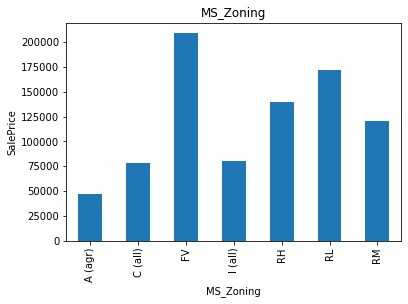

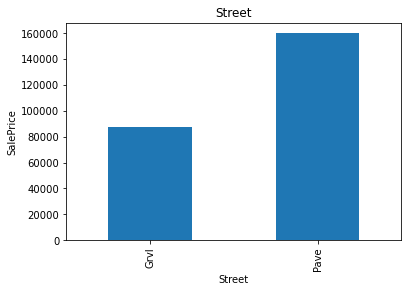

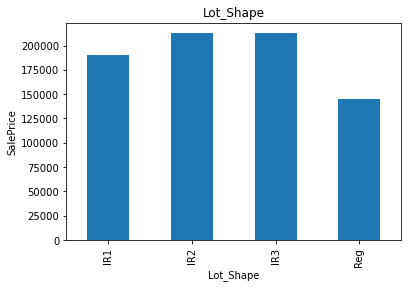

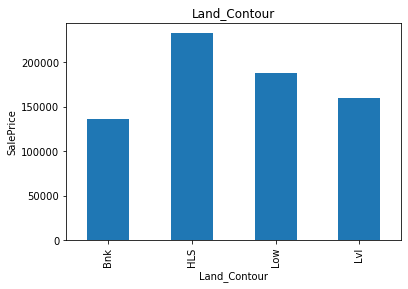

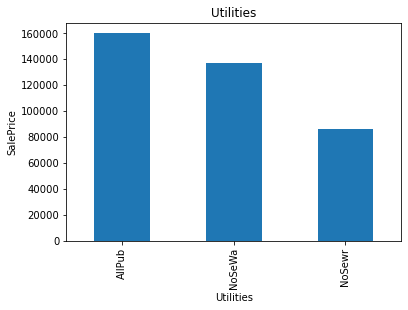

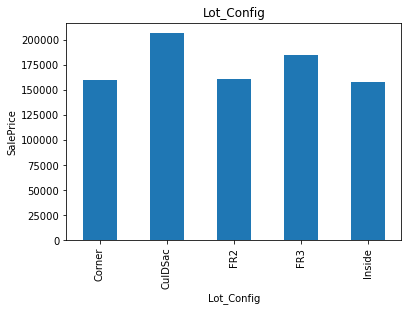

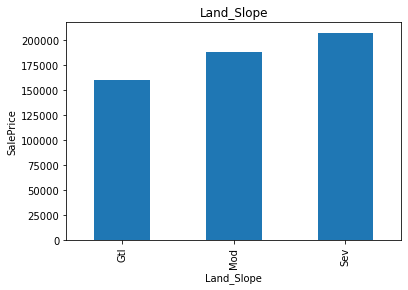

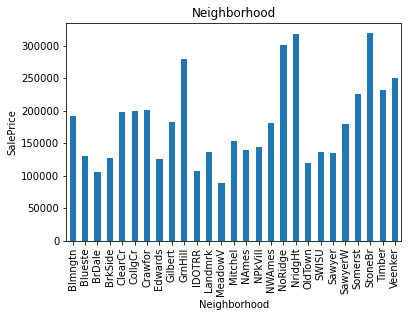

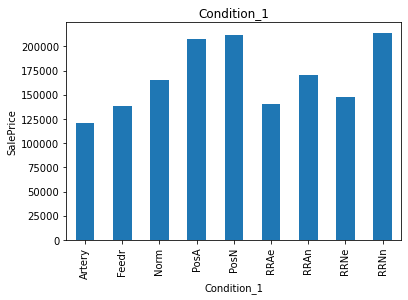

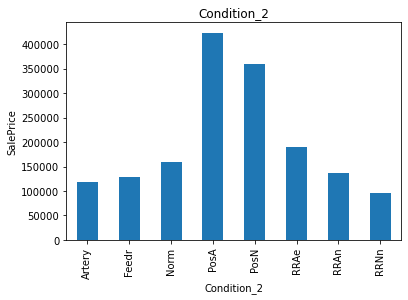

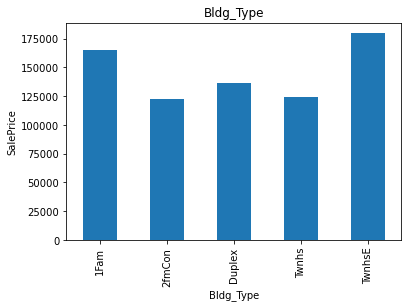

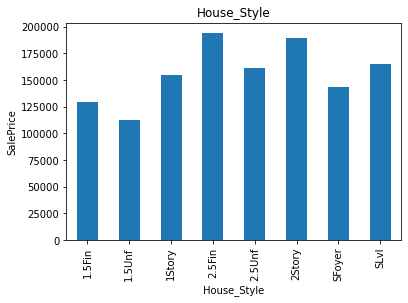

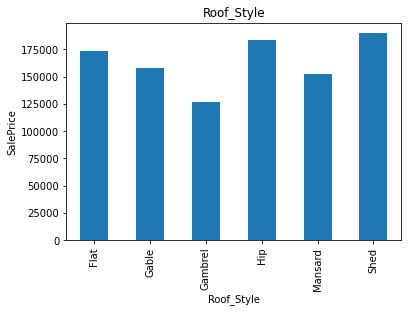

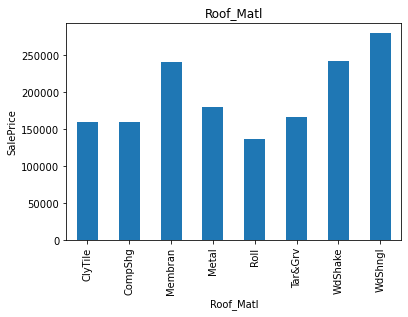

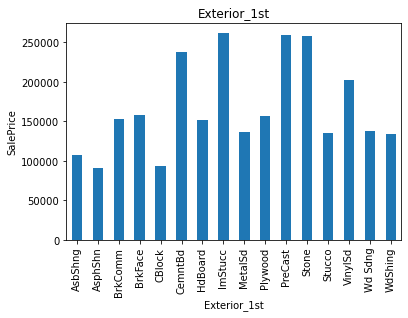

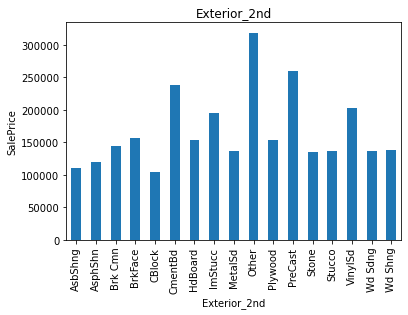

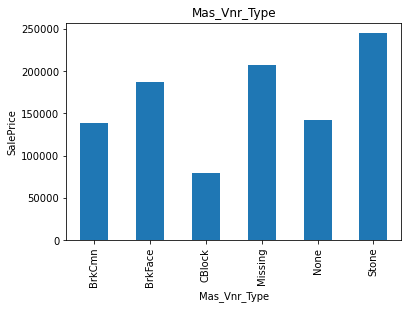

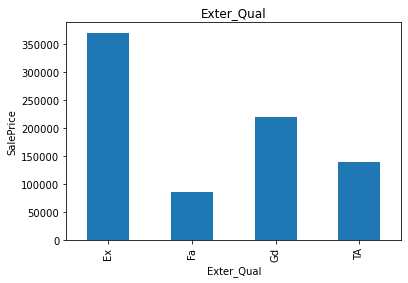

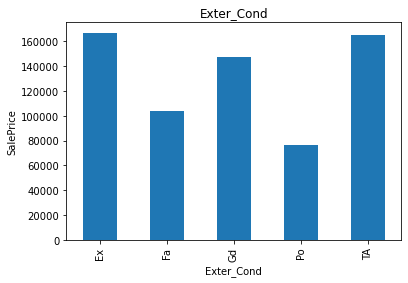

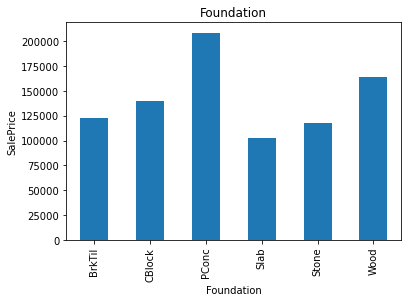

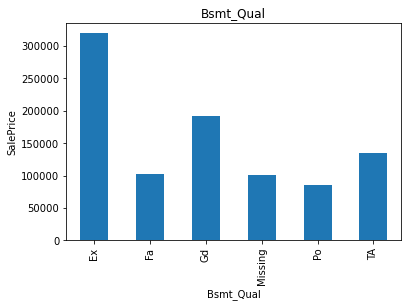

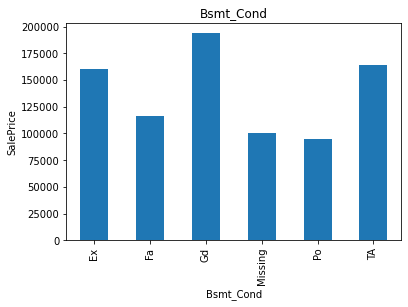

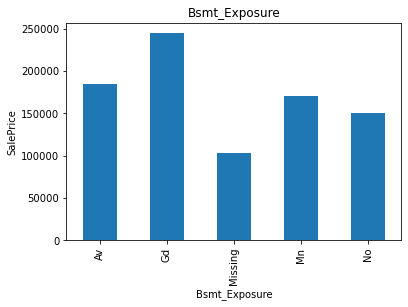

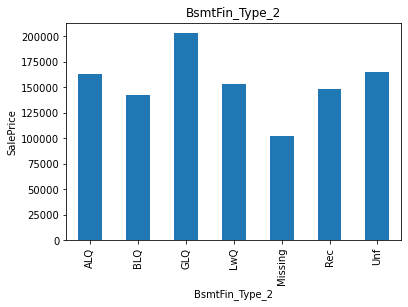

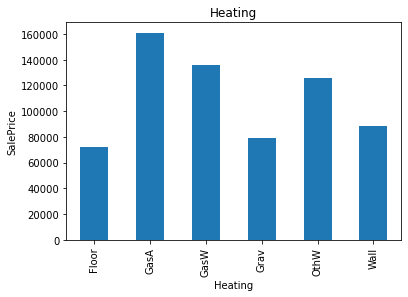

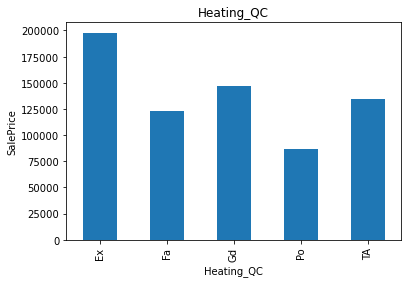

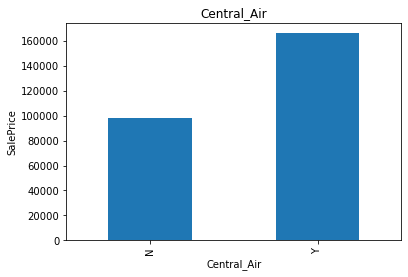

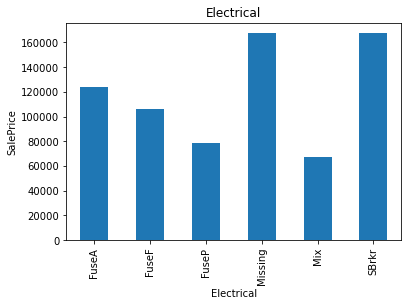

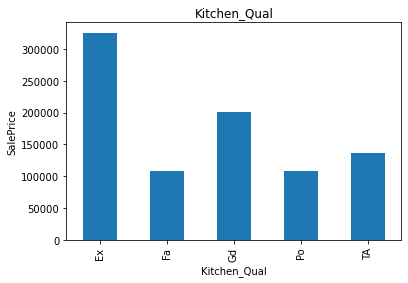

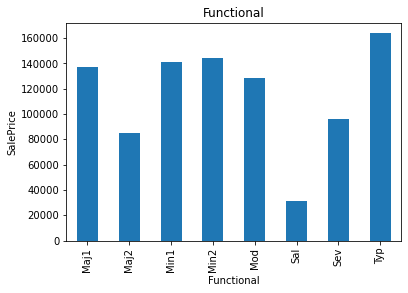

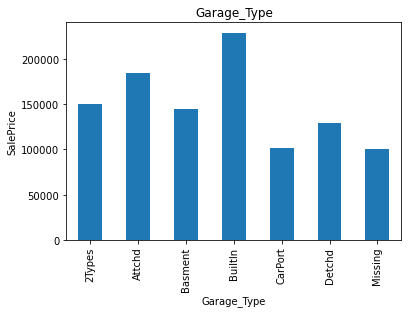

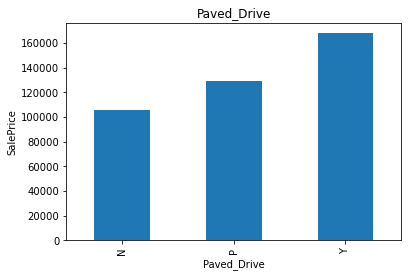

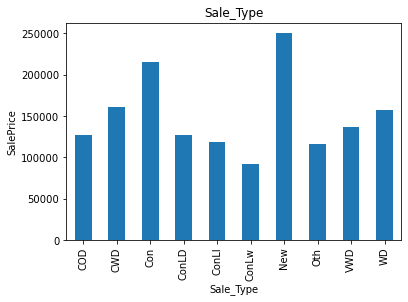

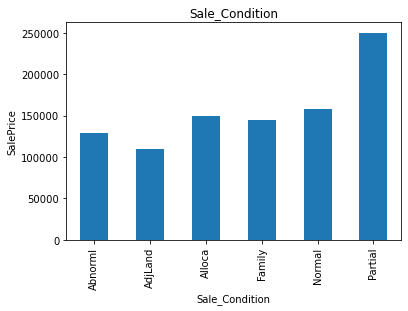

In [239]:
df[cat_features].isnull().sum()
cat_null =['Mas_Vnr_Type','Bsmt_Qual','Bsmt_Cond','Bsmt_Exposure','BsmtFin_Type_1','BsmtFin_Type_2','Fireplace_Qu',
    'Garage_Type', 'Garage_Finish', 'Garage_Qual' ,'Garage_Cond']

# we are replacing all null values within the categorical datset with None 
data = df.copy()
data[cat_features]=data[cat_features].fillna(value='Missing')

for feature in cat_features:    
        data.groupby(feature)['SalePrice'].median().plot.bar()
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.title(feature)
        plt.show()

In [240]:
df.describe()

,Order,PID,MS_SubClass,Lot_Frontage,Lot_Area,Overall_Qual,Overall_Cond,Year_Built,Year_Remod_Add,Mas_Vnr_Area,BsmtFin_SF_1,BsmtFin_SF_2,Bsmt_Unf_SF,Total_Bsmt_SF,_1st_Flr_SF,_2nd_Flr_SF,Low_Qual_Fin_SF,Gr_Liv_Area,Bsmt_Full_Bath,Bsmt_Half_Bath,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,TotRms_AbvGrd,Fireplaces,Garage_Yr_Blt,Garage_Cars,Garage_Area,Wood_Deck_SF,Open_Porch_SF,Enclosed_Porch,_3Ssn_Porch,Screen_Porch,Pool_Area,Misc_Val,Mo_Sold,Yr_Sold,SalePrice
count,2922.000000,2.922000e+03,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2899.000000,2921.000000,2921.000000,2921.000000,2921.000000,2922.000000,2922.000000,2922.000000,2922.000000,2920.000000,2920.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2763.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000
mean,1465.155373,7.149606e+08,57.215948,69.292206,10165.071526,6.089665,5.563997,1971.334360,1984.273101,102.177992,441.462855,49.555974,560.408422,1051.427251,1159.563997,336.374401,4.689596,1500.627995,0.429795,0.061301,1.568104,0.380561,2.859343,1.044490,6.450034,0.596851,1978.128845,1.766176,472.759350,93.613621,47.454483,23.074606,2.599589,16.045859,2.249487,50.773785,6.215606,2007.791239,180761.193018
std,845.282158,1.887504e+08,42.570105,21.301420,7883.962234,1.409425,1.112706,30.283779,20.885958,179.279522,455.618028,169.124153,439.489469,441.117176,392.342097,428.621602,46.373236,505.816478,0.524693,0.245569,0.552901,0.502924,0.823148,0.214357,1.569262,0.646029,25.565198,0.761379,215.295699,126.497216,67.552205,64.215509,25.175369,56.157863,35.645700,567.113099,2.715304,1.315207,79985.980719
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,734.250000,5.284658e+08,20.000000,60.000000,7477.000000,5.000000,5.000000,1954.000000,1965.000000,0.000000,0.000000,0.000000,220.000000,793.000000,876.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129425.000000
50%,1464.500000,5.354541e+08,50.000000,69.224590,9452.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.000000,0.000000,467.000000,989.000000,1082.500000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2195.750000,9.071811e+08,70.000000,78.000000,11561.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,804.000000,1302.000000,1387.750000,704.000000,0.000000,1743.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.000000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [241]:
num_features = df.select_dtypes(include=['int64','float']).columns
cat_features = df.select_dtypes(include=['object']).columns
print(len(num_features), len(cat_features))

39 34


In [242]:
year = [i for i in num_features if 'Yr' in i or 'Year' in i ] #i is the iterartor
print(year)

['Year_Built', 'Year_Remod_Add', 'Garage_Yr_Blt', 'Yr_Sold']


In [243]:
continous_data = [data for data in num_features if data not in year ]
print(f'Count of continous variables: {len(continous_data)}')

Count of continous variables: 35


In [244]:
discrete_data = [data for data in num_features if data not in continous_data]
print(f'Count of discrete variables: {len(discrete_data)}')

Count of discrete variables: 4


## CONTINOUS VARIABLES

In [245]:
df

,Order,PID,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Lot_Shape,Land_Contour,Utilities,Lot_Config,Land_Slope,Neighborhood,Condition_1,Condition_2,Bldg_Type,House_Style,Overall_Qual,Overall_Cond,Year_Built,Year_Remod_Add,Roof_Style,Roof_Matl,Exterior_1st,Exterior_2nd,Mas_Vnr_Type,Mas_Vnr_Area,Exter_Qual,Exter_Cond,Foundation,Bsmt_Qual,Bsmt_Cond,Bsmt_Exposure,BsmtFin_SF_1,BsmtFin_Type_2,BsmtFin_SF_2,Bsmt_Unf_SF,Total_Bsmt_SF,Heating,Heating_QC,Central_Air,Electrical,_1st_Flr_SF,_2nd_Flr_SF,Low_Qual_Fin_SF,Gr_Liv_Area,Bsmt_Full_Bath,Bsmt_Half_Bath,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,Kitchen_Qual,TotRms_AbvGrd,Functional,Fireplaces,Garage_Type,Garage_Yr_Blt,Garage_Cars,Garage_Area,Paved_Drive,Wood_Deck_SF,Open_Porch_SF,Enclosed_Porch,_3Ssn_Porch,Screen_Porch,Pool_Area,Misc_Val,Mo_Sold,Yr_Sold,Sale_Type,Sale_Condition,SalePrice
0,1,526301100,20,RL,141.00000,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Attchd,1960.0,2.0,528.0,P,210,62,0,0,0,0,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.00000,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,Attchd,1961.0,1.0,730.0,Y,140,0,0,0,120,0,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.00000,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,Attchd,1958.0,1.0,312.0,Y,393,36,0,0,0,0,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.00000,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,Attchd,1968.0,2.0,522.0,Y,0,0,0,0,0,0,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.00000,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,Attchd,1997.0,2.0,482.0,Y,212,34,0,0,0,0,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.00000,7937,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,Norm,1Fam,SLvl,6,6,1984,1984,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,Av,819.0,Unf,0.0,184.0,1003.0,GasA,TA,Y,SBrkr,1003,0,0,1003,1.0,0.0,1,0,3,1,TA,6,Typ,0,Detchd,1984.0,2.0,588.0,Y,120,0,0,0,0,0,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,69.22459,8885,Pave,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,1Story,5,5,1983,1983,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,Gd,TA,Av,301.0,ALQ,324.0,239.0,864.0,GasA,TA,Y,SBrkr,902,0,0,902,1.0,0.0,1,0,2,1,TA,5,Typ,0,Attchd,1983.0,2.0,484.0,Y,164,0,0,0,0,0,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.00000,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,NaN,NaN,0.0,0.0,Y,80,32,0,0,0,0,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.00000,10010,Pave,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,1Story,5,5,1974,1975,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,Gd,TA,Av,1071.0,LwQ,123.0,195.0,1389.0,GasA,Gd,Y,SBrkr,1389,0,0,1389,1.0,0.0,1,0,2,1,TA,6,Typ,1,Attchd,197

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


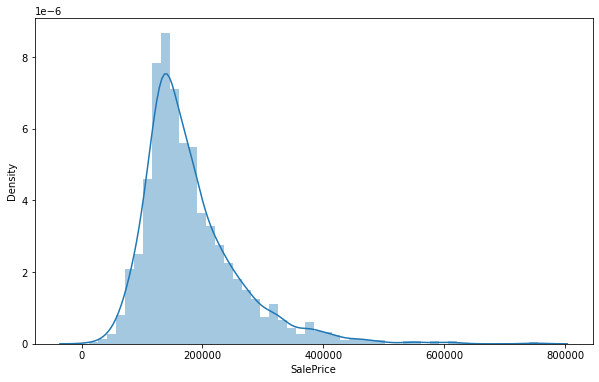

In [246]:
plt.figure(figsize=(10,6));
sns.distplot(df['SalePrice']);
plt.show();

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SalePrice'>

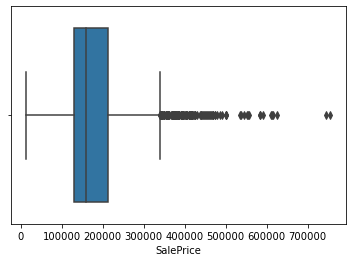

In [247]:
sns.boxplot(df['SalePrice'])

In [248]:
print(f'The Skewness of Sale Price is:', df['SalePrice'].skew())
print(f'The Kurtosis of Sale Price is:', df['SalePrice'].kurtosis())

The Skewness of Sale Price is: 1.7430176110528586
The Kurtosis of Sale Price is: 5.103825631594035


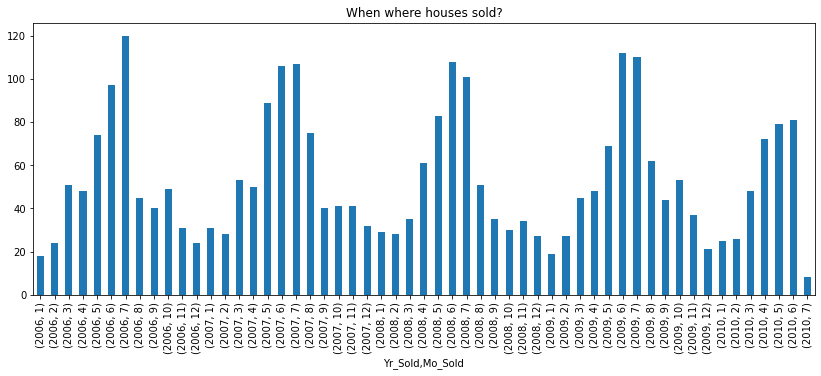

In [249]:
df.groupby(['Yr_Sold','Mo_Sold']).PID.count().plot(kind='bar', figsize=(14,5))
plt.title('When where houses sold?')
plt.show()

### Only _1st_flr_SF, Total_Bsmt_SF, Lot_Frontage, SalePrice is somewhat normally distributed

### Skewness as a qunatative figure: +ve value : Right Skewed; -ve value: Left skewed; 0 : Normal Distribution 

In [250]:
#Garage_Area is closest to the normal distribution with value of 0.24. 
#All the data has positive skewness with larger right tail.
skewness

NameError: name 'skewness' is not defined

In [251]:
## DISCRETE VALUES

In [252]:
df.head()

,Order,PID,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Lot_Shape,Land_Contour,Utilities,Lot_Config,Land_Slope,Neighborhood,Condition_1,Condition_2,Bldg_Type,House_Style,Overall_Qual,Overall_Cond,Year_Built,Year_Remod_Add,Roof_Style,Roof_Matl,Exterior_1st,Exterior_2nd,Mas_Vnr_Type,Mas_Vnr_Area,Exter_Qual,Exter_Cond,Foundation,Bsmt_Qual,Bsmt_Cond,Bsmt_Exposure,BsmtFin_SF_1,BsmtFin_Type_2,BsmtFin_SF_2,Bsmt_Unf_SF,Total_Bsmt_SF,Heating,Heating_QC,Central_Air,Electrical,_1st_Flr_SF,_2nd_Flr_SF,Low_Qual_Fin_SF,Gr_Liv_Area,Bsmt_Full_Bath,Bsmt_Half_Bath,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,Kitchen_Qual,TotRms_AbvGrd,Functional,Fireplaces,Garage_Type,Garage_Yr_Blt,Garage_Cars,Garage_Area,Paved_Drive,Wood_Deck_SF,Open_Porch_SF,Enclosed_Porch,_3Ssn_Porch,Screen_Porch,Pool_Area,Misc_Val,Mo_Sold,Yr_Sold,Sale_Type,Sale_Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Attchd,1960.0,2.0,528.0,P,210,62,0,0,0,0,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,Attchd,1961.0,1.0,730.0,Y,140,0,0,0,120,0,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,Attchd,1958.0,1.0,312.0,Y,393,36,0,0,0,0,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,Attchd,1968.0,2.0,522.0,Y,0,0,0,0,0,0,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,Attchd,1997.0,2.0,482.0,Y,212,34,0,0,0,0,0,3,2010,WD,Normal,189900


## Categorical Data

In [253]:
for cat in cat_features:
    print(f'The number of unique features in {cat} is {len(df[cat].unique())}')

The number of unique features in MS_Zoning is 7
The number of unique features in Street is 2
The number of unique features in Lot_Shape is 4
The number of unique features in Land_Contour is 4
The number of unique features in Utilities is 3
The number of unique features in Lot_Config is 5
The number of unique features in Land_Slope is 3
The number of unique features in Neighborhood is 27
The number of unique features in Condition_1 is 9
The number of unique features in Condition_2 is 8
The number of unique features in Bldg_Type is 5
The number of unique features in House_Style is 8
The number of unique features in Roof_Style is 6
The number of unique features in Roof_Matl is 8
The number of unique features in Exterior_1st is 16
The number of unique features in Exterior_2nd is 17
The number of unique features in Mas_Vnr_Type is 6
The number of unique features in Exter_Qual is 4
The number of unique features in Exter_Cond is 5
The number of unique features in Foundation is 6
The number of

In [254]:
x=list(enumerate(cat_features))
print(x[0])

(0, 'MS_Zoning')


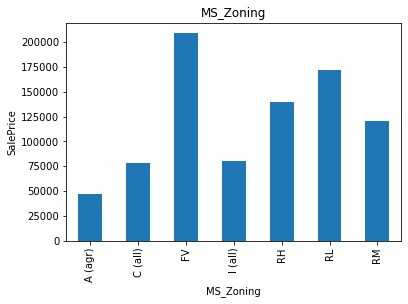

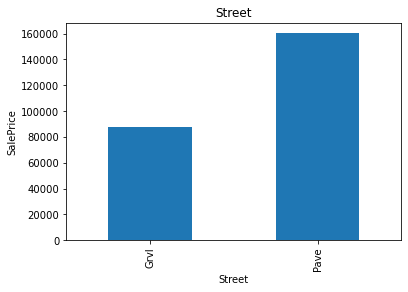

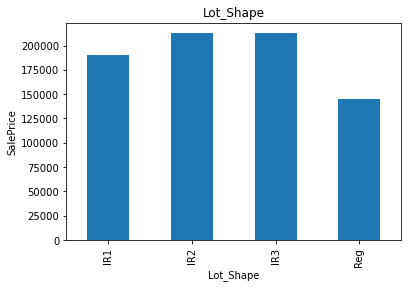

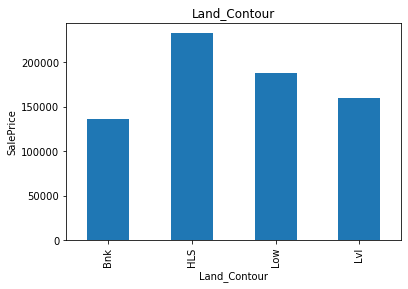

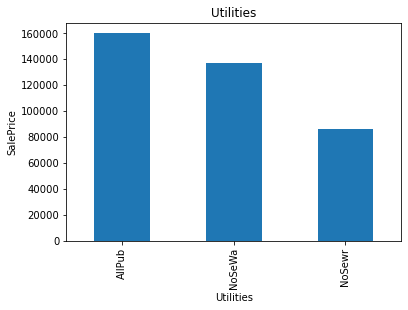

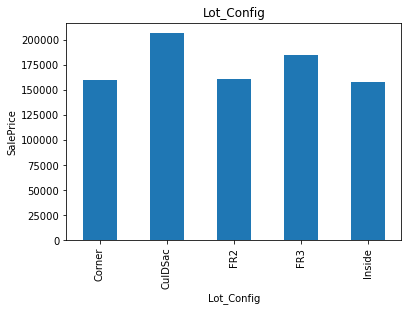

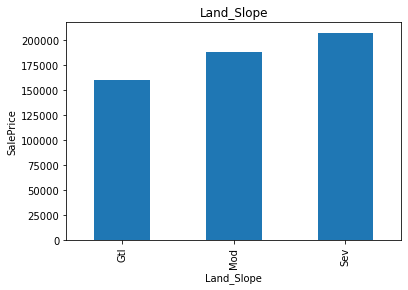

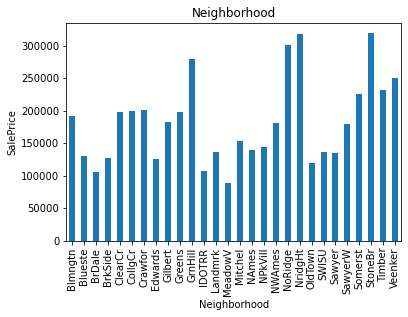

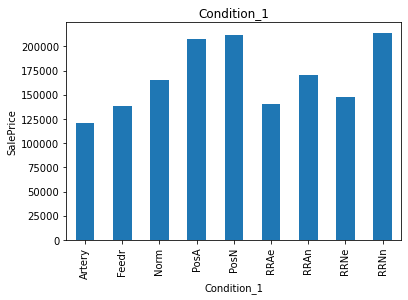

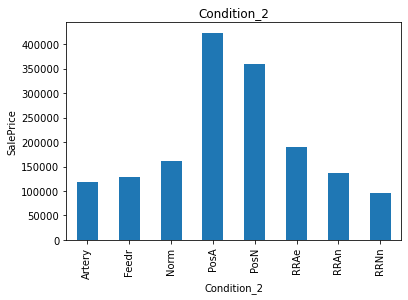

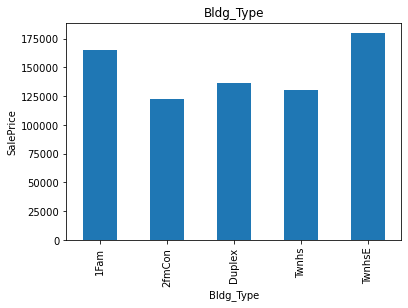

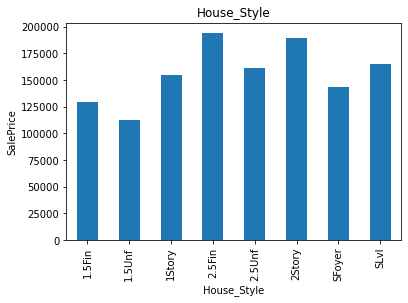

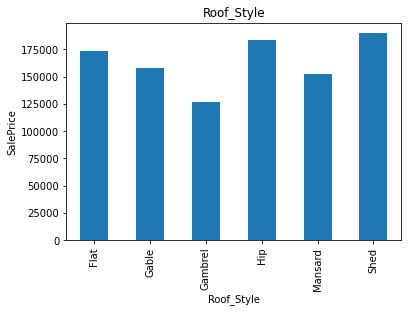

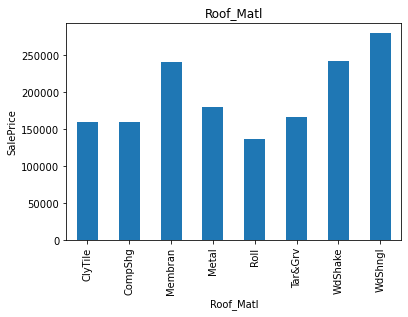

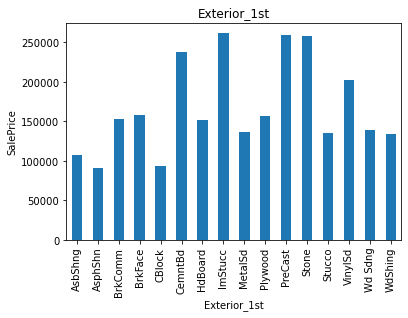

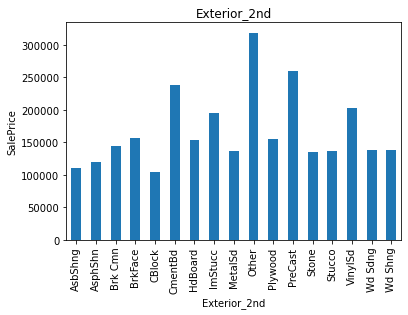

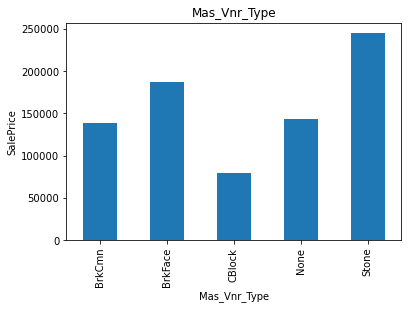

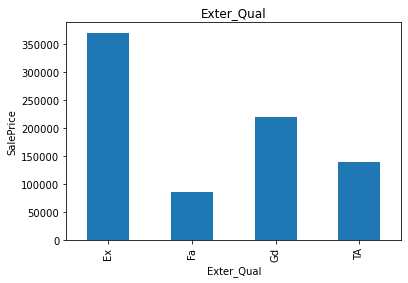

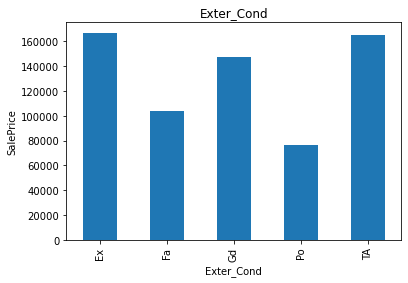

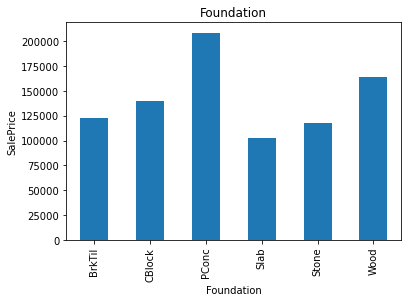

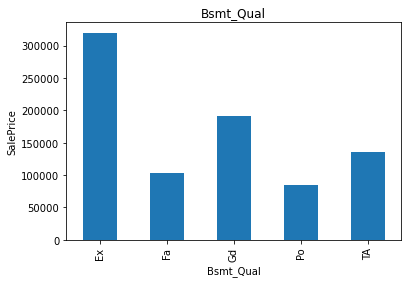

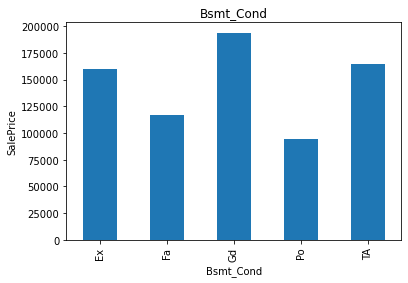

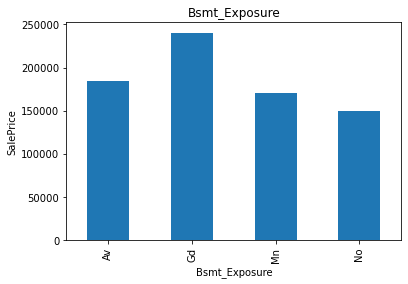

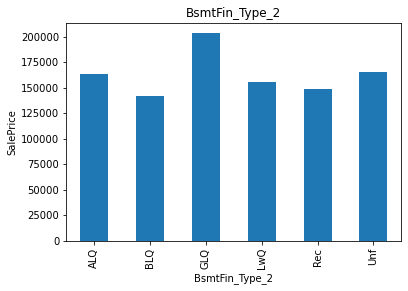

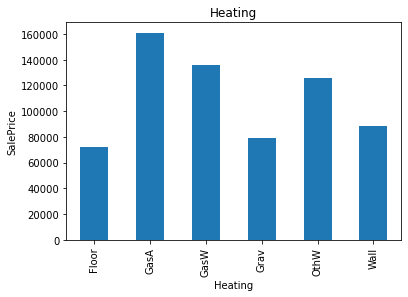

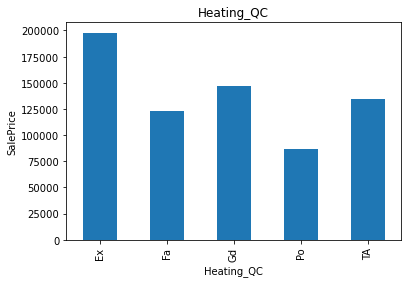

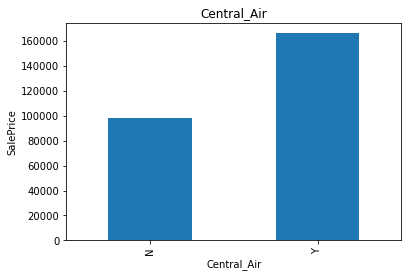

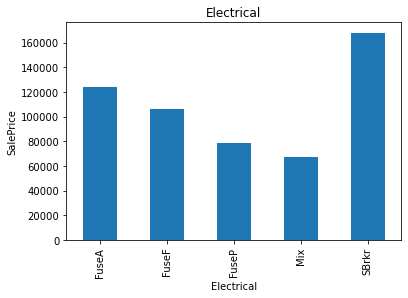

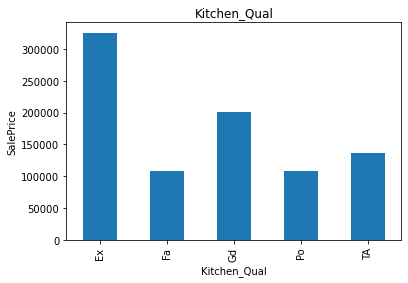

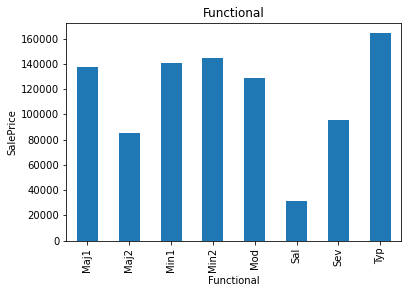

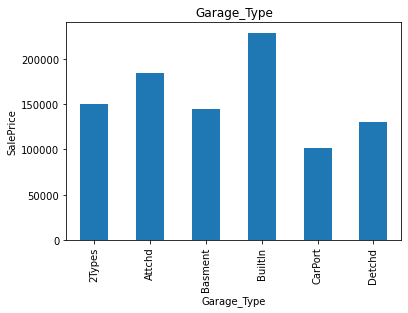

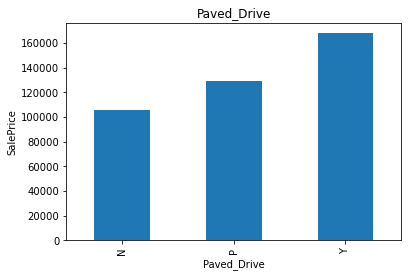

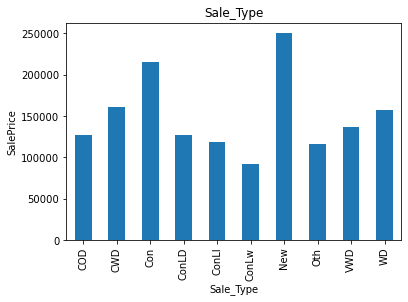

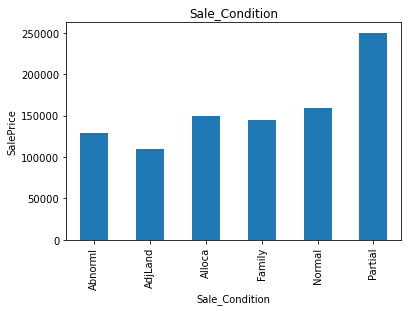

In [255]:
for feature in cat_features:
    data=dataset.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar() 
    #beacause we have outliers.We consider the meadian value for each feature.
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

## Dealing with Missing Values:
## Transforming NaN values by giving label "Missing" i.e creating a new category

In [256]:
# we capture all the missing values and store in the categorical_nan variable which is a list type
categorical_nan = [feature for feature in cat_features if df[feature].isnull().sum()>1]
print(categorical_nan)

['Mas_Vnr_Type', 'Bsmt_Qual', 'Bsmt_Cond', 'Bsmt_Exposure', 'BsmtFin_Type_2', 'Garage_Type']


In [257]:
# within the for loop we catch all the NaN values and replace with new label "Missing"
for feature in categorical_nan:
    dataset = df.copy()
    dataset[categorical_nan] = dataset[categorical_nan].fillna('Missing')

## Dealing with missing values in numerical features

In [264]:
dataset = df.copy()
numerical_nan = [feature for feature in num_features if dataset[feature].isnull().sum()>1]
for feature in numerical_nan:
    #dataset=df.copy()
    dataset[feature].fillna(dataset[feature].mean(),inplace=True)

In [265]:
dataset.isnull().sum()

Order             0
PID               0
MS_SubClass       0
MS_Zoning         0
Lot_Frontage      0
                 ..
Mo_Sold           0
Yr_Sold           0
Sale_Type         0
Sale_Condition    0
SalePrice         0
Length: 73, dtype: int64

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


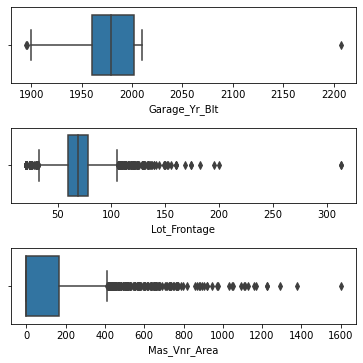

In [266]:
missing_features = ['Garage_Yr_Blt','Lot_Frontage','Mas_Vnr_Area'];
fig,(ax1,ax2,ax3)=plt.subplots(3,1);
sns.boxplot(df['Garage_Yr_Blt'],ax=ax1);
sns.boxplot(df['Lot_Frontage'],ax=ax2);
sns.boxplot(df['Mas_Vnr_Area'],ax=ax3);
plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9, top=1.2, wspace=0.6,hspace=0.6);
plt.show();


In [267]:
## Dealing with year value

In [268]:
year = ['Year_Built','Year_Remod_Add','Garage_Yr_Blt','Yr_Sold']

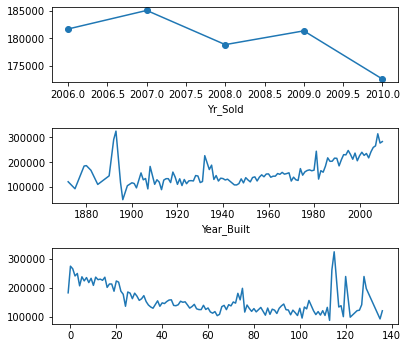

In [269]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1)
df.groupby('Yr_Sold')['SalePrice'].mean().plot(marker="o",ax=ax1)
df.groupby('Year_Built')['SalePrice'].mean().plot(ax=ax2)
year_diff = df['Yr_Sold']-df['Year_Built']
df.groupby(year_diff)['SalePrice'].mean().plot(ax=ax3)
plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9, top=1.2, wspace=0.6,hspace=0.6)
plt.show()

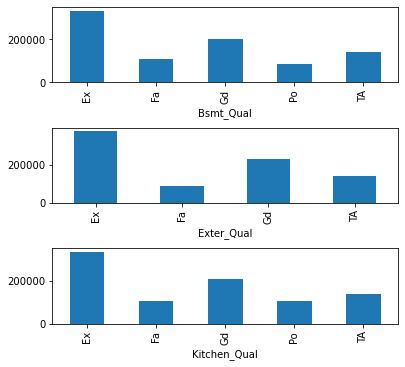

In [270]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1)
df.groupby('Bsmt_Qual')['SalePrice'].mean().plot.bar(ax=ax1)
df.groupby('Exter_Qual')['SalePrice'].mean().plot.bar(ax=ax2)
df.groupby('Kitchen_Qual')['SalePrice'].mean().plot.bar(ax=ax3)
plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9, top=1.2, wspace=0.6,hspace=0.6)

### The Sale Price of house is decereasing with increase in Year Sold
###  Dip in sale price bewteen 40 -60 and 80-110 year difference

# Hypothesis Testing
### H0: Earlier the house built lesser the SalePrice
### Ha: Earlier the house built more the Sale Price
#### We reject H0 if p-value is lesser than alpha

In [272]:
X = df['Year_Built'].array
Y = df['SalePrice'].array
result = stats.pearsonr(X,Y) #pearson correlation
print(result)
# Here we reject the null hypothesis with extremely strong evidence as the p-value is lesser that 0.001

(0.5584352168635619, 2.750160747866146e-239)


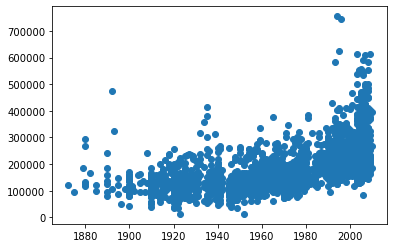

In [273]:
plt.scatter(df['Year_Built'],df["SalePrice"])


## FOR ORDINAL DATA:
## FOR NOMINAL DATA: Use One Hot Encoding

In [274]:
cat_features

Index(['MS_Zoning', 'Street', 'Lot_Shape', 'Land_Contour', 'Utilities',
       'Lot_Config', 'Land_Slope', 'Neighborhood', 'Condition_1',
       'Condition_2', 'Bldg_Type', 'House_Style', 'Roof_Style', 'Roof_Matl',
       'Exterior_1st', 'Exterior_2nd', 'Mas_Vnr_Type', 'Exter_Qual',
       'Exter_Cond', 'Foundation', 'Bsmt_Qual', 'Bsmt_Cond', 'Bsmt_Exposure',
       'BsmtFin_Type_2', 'Heating', 'Heating_QC', 'Central_Air', 'Electrical',
       'Kitchen_Qual', 'Functional', 'Garage_Type', 'Paved_Drive', 'Sale_Type',
       'Sale_Condition'],
      dtype='object')

In [275]:
model_set = df.copy()
pd.get_dummies(model_set)

,Order,PID,MS_SubClass,Lot_Frontage,Lot_Area,Overall_Qual,Overall_Cond,Year_Built,Year_Remod_Add,Mas_Vnr_Area,BsmtFin_SF_1,BsmtFin_SF_2,Bsmt_Unf_SF,Total_Bsmt_SF,_1st_Flr_SF,_2nd_Flr_SF,Low_Qual_Fin_SF,Gr_Liv_Area,Bsmt_Full_Bath,Bsmt_Half_Bath,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,TotRms_AbvGrd,Fireplaces,Garage_Yr_Blt,Garage_Cars,Garage_Area,Wood_Deck_SF,Open_Porch_SF,Enclosed_Porch,_3Ssn_Porch,Screen_Porch,Pool_Area,Misc_Val,Mo_Sold,Yr_Sold,SalePrice,MS_Zoning_A (agr),MS_Zoning_C (all),MS_Zoning_FV,MS_Zoning_I (all),MS_Zoning_RH,MS_Zoning_RL,MS_Zoning_RM,Street_Grvl,Street_Pave,Lot_Shape_IR1,Lot_Shape_IR2,Lot_Shape_IR3,Lot_Shape_Reg,Land_Contour_Bnk,Land_Contour_HLS,Land_Contour_Low,Land_Contour_Lvl,Utilities_AllPub,Utilities_NoSeWa,Utilities_NoSewr,Lot_Config_Corner,Lot_Config_CulDSac,Lot_Config_FR2,Lot_Config_FR3,Lot_Config_Inside,Land_Slope_Gtl,Land_Slope_Mod,Land_Slope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition_1_Artery,Condition_1_Feedr,Condition_1_Norm,Condition_1_PosA,Condition_1_PosN,Condition_1_RRAe,Condition_1_RRAn,Condition_1_RRNe,Condition_1_RRNn,Condition_2_Artery,Condition_2_Feedr,Condition_2_Norm,Condition_2_PosA,Condition_2_PosN,Condition_2_RRAe,Condition_2_RRAn,Condition_2_RRNn,Bldg_Type_1Fam,Bldg_Type_2fmCon,Bldg_Type_Duplex,Bldg_Type_Twnhs,Bldg_Type_TwnhsE,House_Style_1.5Fin,House_Style_1.5Unf,House_Style_1Story,House_Style_2.5Fin,House_Style_2.5Unf,House_Style_2Story,House_Style_SFoyer,House_Style_SLvl,Roof_Style_Flat,Roof_Style_Gable,Roof_Style_Gambrel,Roof_Style_Hip,Roof_Style_Mansard,Roof_Style_Shed,Roof_Matl_ClyTile,Roof_Matl_CompShg,Roof_Matl_Membran,Roof_Matl_Metal,Roof_Matl_Roll,Roof_Matl_Tar&Grv,Roof_Matl_WdShake,Roof_Matl_WdShngl,Exterior_1st_AsbShng,Exterior_1st_AsphShn,Exterior_1st_BrkComm,Exterior_1st_BrkFace,Exterior_1st_CBlock,Exterior_1st_CemntBd,Exterior_1st_HdBoard,Exterior_1st_ImStucc,Exterior_1st_MetalSd,Exterior_1st_Plywood,Exterior_1st_PreCast,Exterior_1st_Stone,Exterior_1st_Stucco,Exterior_1st_VinylSd,Exterior_1st_Wd Sdng,Exterior_1st_WdShing,Exterior_2nd_AsbShng,Exterior_2nd_AsphShn,Exterior_2nd_Brk Cmn,Exterior_2nd_BrkFace,Exterior_2nd_CBlock,Exterior_2nd_CmentBd,Exterior_2nd_HdBoard,Exterior_2nd_ImStucc,Exterior_2nd_MetalSd,Exterior_2nd_Other,Exterior_2nd_Plywood,Exterior_2nd_PreCast,Exterior_2nd_Stone,Exterior_2nd_Stucco,Exterior_2nd_VinylSd,Exterior_2nd_Wd Sdng,Exterior_2nd_Wd Shng,Mas_Vnr_Type_BrkCmn,Mas_Vnr_Type_BrkFace,Mas_Vnr_Type_CBlock,Mas_Vnr_Type_None,Mas_Vnr_Type_Stone,Exter_Qual_Ex,Exter_Qual_Fa,Exter_Qual_Gd,Exter_Qual_TA,Exter_Cond_Ex,Exter_Cond_Fa,Exter_Cond_Gd,Exter_Cond_Po,Exter_Cond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Bsmt_Qual_Ex,Bsmt_Qual_Fa,Bsmt_Qual_Gd,Bsmt_Qual_Po,Bsmt_Qual_TA,Bsmt_Cond_Ex,Bsmt_Cond_Fa,Bsmt_Cond_Gd,Bsmt_Cond_Po,Bsmt_Cond_TA,Bsmt_Exposure_Av,Bsmt_Exposure_Gd,Bsmt_Exposure_Mn,Bsmt_Exposure_No,BsmtFin_Type_2_ALQ,BsmtFin_Type_2_BLQ,BsmtFin_Type_2_GLQ,BsmtFin_Type_2_LwQ,BsmtFin_Type_2_Rec,BsmtFin_Type_2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Heating_QC_Ex,Heating_QC_Fa,Heating_QC_Gd,Heating_QC_Po,Heating_QC_TA,Central_Air_N,Central_Air_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Kitchen_Qual_Ex,Kitchen_Qual_Fa,Kitchen_Qual_Gd,Kitchen_Qual_Po,Kitchen_Qual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Sev,Fu

In [276]:
model_set

,Order,PID,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Lot_Shape,Land_Contour,Utilities,Lot_Config,Land_Slope,Neighborhood,Condition_1,Condition_2,Bldg_Type,House_Style,Overall_Qual,Overall_Cond,Year_Built,Year_Remod_Add,Roof_Style,Roof_Matl,Exterior_1st,Exterior_2nd,Mas_Vnr_Type,Mas_Vnr_Area,Exter_Qual,Exter_Cond,Foundation,Bsmt_Qual,Bsmt_Cond,Bsmt_Exposure,BsmtFin_SF_1,BsmtFin_Type_2,BsmtFin_SF_2,Bsmt_Unf_SF,Total_Bsmt_SF,Heating,Heating_QC,Central_Air,Electrical,_1st_Flr_SF,_2nd_Flr_SF,Low_Qual_Fin_SF,Gr_Liv_Area,Bsmt_Full_Bath,Bsmt_Half_Bath,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,Kitchen_Qual,TotRms_AbvGrd,Functional,Fireplaces,Garage_Type,Garage_Yr_Blt,Garage_Cars,Garage_Area,Paved_Drive,Wood_Deck_SF,Open_Porch_SF,Enclosed_Porch,_3Ssn_Porch,Screen_Porch,Pool_Area,Misc_Val,Mo_Sold,Yr_Sold,Sale_Type,Sale_Condition,SalePrice
0,1,526301100,20,RL,141.00000,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Attchd,1960.0,2.0,528.0,P,210,62,0,0,0,0,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.00000,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,Attchd,1961.0,1.0,730.0,Y,140,0,0,0,120,0,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.00000,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,Attchd,1958.0,1.0,312.0,Y,393,36,0,0,0,0,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.00000,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,Attchd,1968.0,2.0,522.0,Y,0,0,0,0,0,0,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.00000,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,Attchd,1997.0,2.0,482.0,Y,212,34,0,0,0,0,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.00000,7937,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,Norm,1Fam,SLvl,6,6,1984,1984,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,Av,819.0,Unf,0.0,184.0,1003.0,GasA,TA,Y,SBrkr,1003,0,0,1003,1.0,0.0,1,0,3,1,TA,6,Typ,0,Detchd,1984.0,2.0,588.0,Y,120,0,0,0,0,0,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,69.22459,8885,Pave,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,1Story,5,5,1983,1983,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,Gd,TA,Av,301.0,ALQ,324.0,239.0,864.0,GasA,TA,Y,SBrkr,902,0,0,902,1.0,0.0,1,0,2,1,TA,5,Typ,0,Attchd,1983.0,2.0,484.0,Y,164,0,0,0,0,0,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.00000,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,NaN,NaN,0.0,0.0,Y,80,32,0,0,0,0,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.00000,10010,Pave,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,1Story,5,5,1974,1975,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,Gd,TA,Av,1071.0,LwQ,123.0,195.0,1389.0,GasA,Gd,Y,SBrkr,1389,0,0,1389,1.0,0.0,1,0,2,1,TA,6,Typ,1,Attchd,197

In [277]:
def subplot_scatter(dataframe, list_of_columns):
    nrows = int(np.ceil(len(list_of_columns)/3)) 
    fig, ax = plt.subplots(nrows=nrows, ncols=3,figsize=(15, nrows*3.5)) 
    ax = ax.ravel() 
    for i, column in enumerate(list_of_columns): 
        sns.regplot(y=dataframe.SalePrice, x=dataframe[column],ax=ax[i], \
                    scatter_kws={'facecolors':'skyblue','edgecolor':'skyblue'},
                    line_kws = {'color':'grey'})
        ax[i].set_title(f'{column} vs saleprice',fontsize=14)  
        ax[i].tick_params(labelsize=12)
        ax[i].set_xlabel(column, fontsize=14)
        ax[i].set_ylabel('SalePrice', fontsize=14)
    plt.tight_layout()

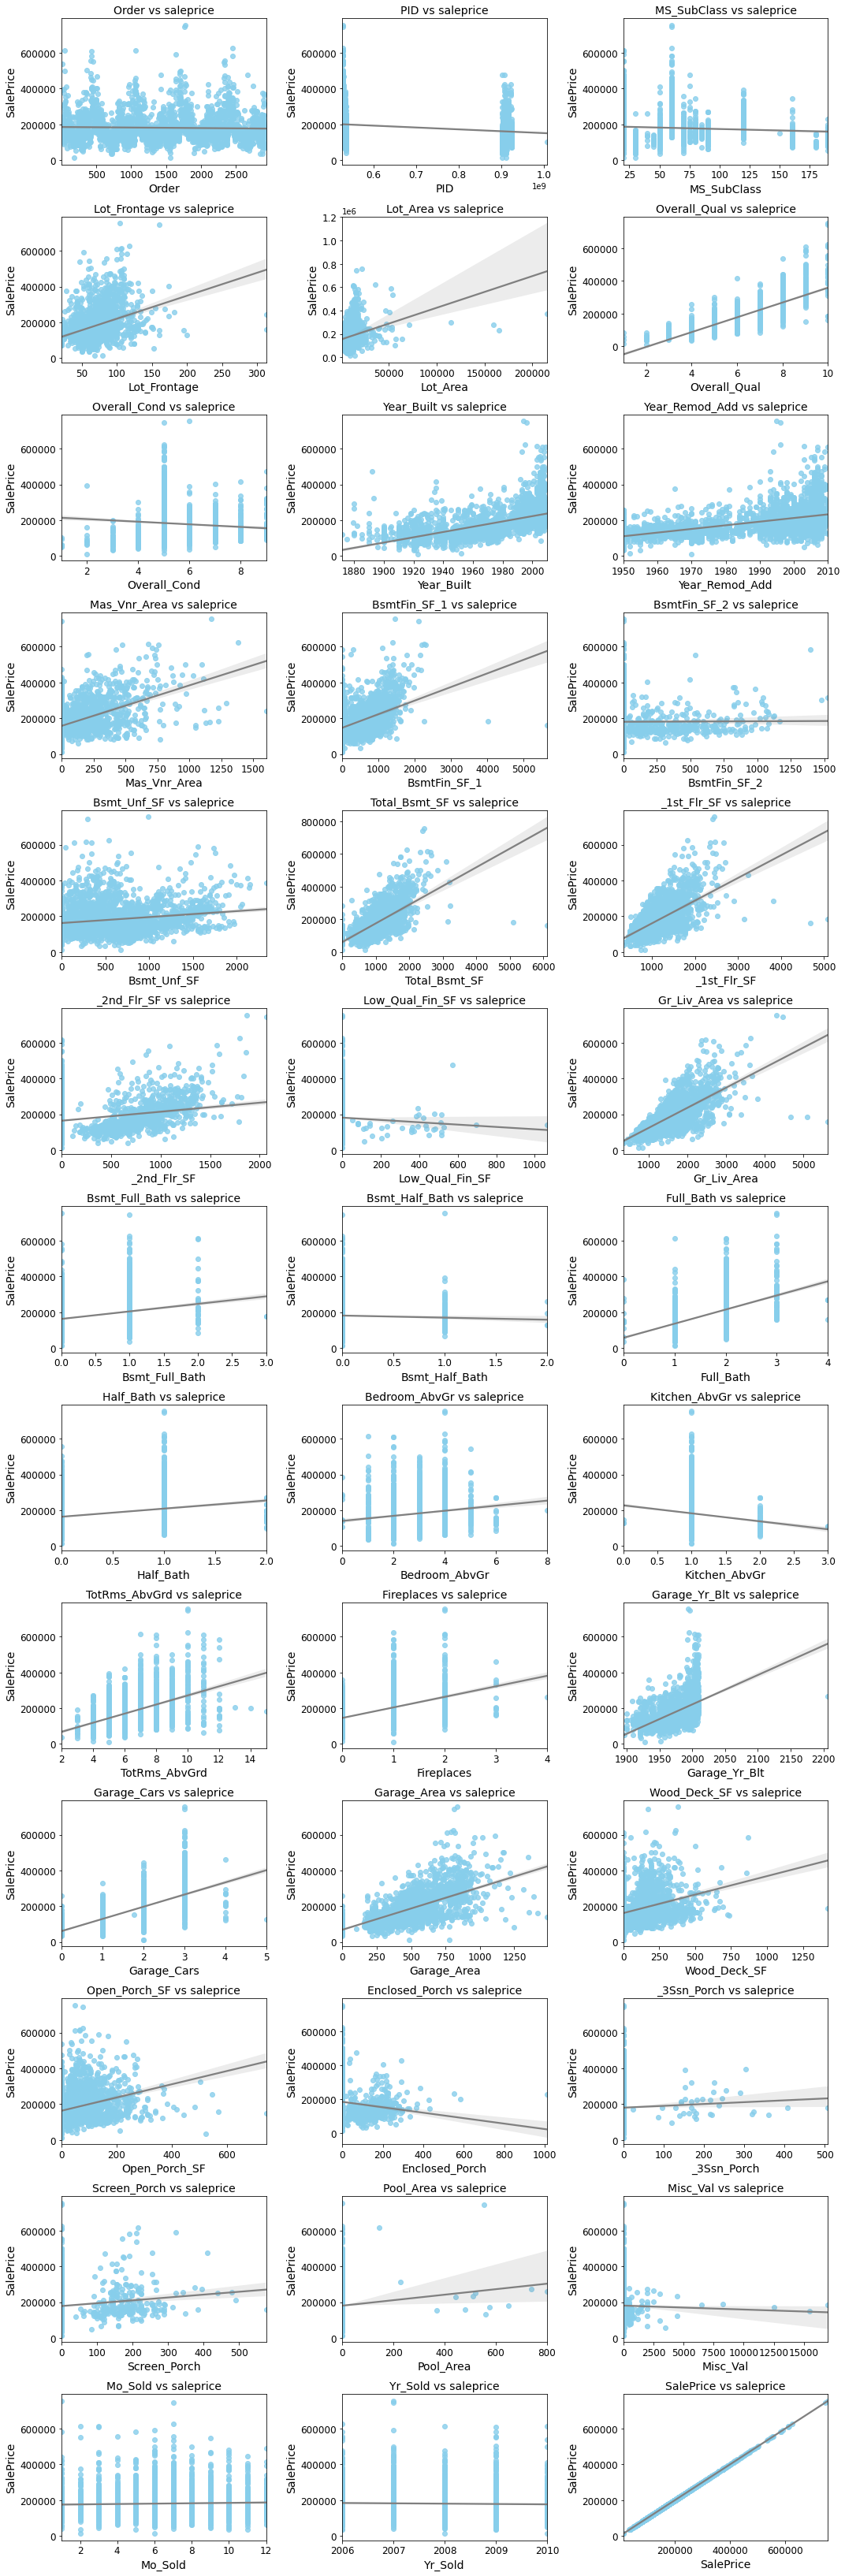

In [278]:
subplot_scatter(df,num_features);

((array([-3.4948225 , -3.25063777, -3.11557897, ...,  3.11557897,
          3.25063777,  3.4948225 ]),
  array([ 12789,  13100,  34900, ..., 625000, 745000, 755000], dtype=int64)),
 (74909.22485267016, 180761.1930184805, 0.9356802136761391))

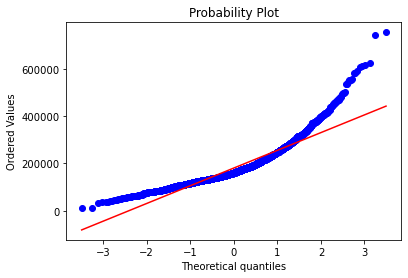

In [279]:
stats.probplot(df['SalePrice'],plot=plt)

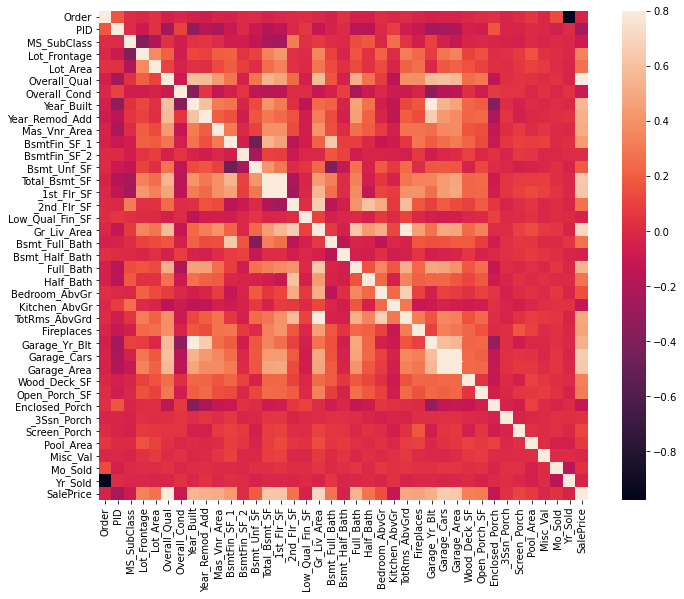

In [280]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);


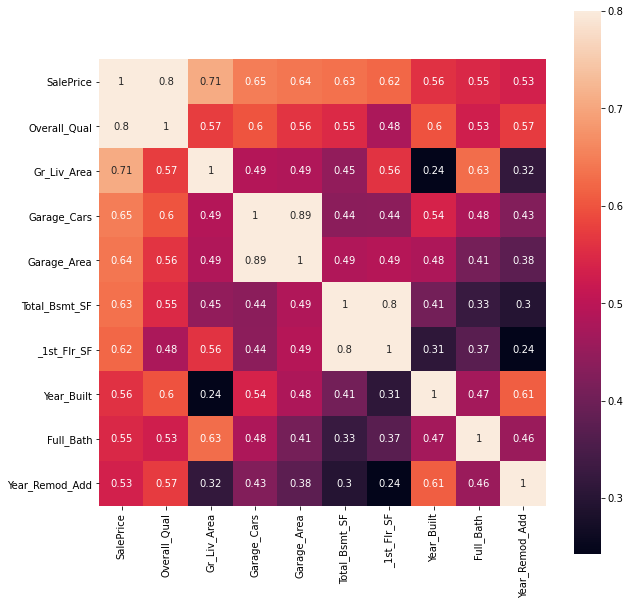

In [281]:
# correlation matrix depicting the the top 10 most correlated features.
f, ax = plt.subplots(figsize=(10, 10))
corr_cols = df.corr().nlargest(10, 'SalePrice').index
sns.heatmap(df[corr_cols].corr(), vmax=.8, square=True,annot=True);

### multi-collinearity exixts between:
- Total_Bsmt_SF and 1st_Flr_Sf :0.8
- Garage Area and Garage Cars: 0.89
- Gr_Liv Area and Full_Bath

In [282]:
cat_imp=['Exter_Qual','Bsmt_Qual','Kitchen_Qual']
cat_imp=pd.get_dummies(df[cat_imp])
cat_imp

,Exter_Qual_Ex,Exter_Qual_Fa,Exter_Qual_Gd,Exter_Qual_TA,Bsmt_Qual_Ex,Bsmt_Qual_Fa,Bsmt_Qual_Gd,Bsmt_Qual_Po,Bsmt_Qual_TA,Kitchen_Qual_Ex,Kitchen_Qual_Fa,Kitchen_Qual_Gd,Kitchen_Qual_Po,Kitchen_Qual_TA
0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
1,0,0,0,1,0,0,0,0,1,0,0,0,0,1
2,0,0,0,1,0,0,0,0,1,0,0,1,0,0
3,0,0,1,0,0,0,0,0,1,1,0,0,0,0
4,0,0,0,1,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,0,0,0,1,0,0,0,0,1,0,0,0,0,1
2926,0,0,0,1,0,0,1,0,0,0,0,0,0,1
2927,0,0,0,1,0,0,1,0,0,0,0,0,0,1
2928,0,0,0,1,0,0,1,0,0,0,0,0,0,1


In [283]:
cat_features

Index(['MS_Zoning', 'Street', 'Lot_Shape', 'Land_Contour', 'Utilities',
       'Lot_Config', 'Land_Slope', 'Neighborhood', 'Condition_1',
       'Condition_2', 'Bldg_Type', 'House_Style', 'Roof_Style', 'Roof_Matl',
       'Exterior_1st', 'Exterior_2nd', 'Mas_Vnr_Type', 'Exter_Qual',
       'Exter_Cond', 'Foundation', 'Bsmt_Qual', 'Bsmt_Cond', 'Bsmt_Exposure',
       'BsmtFin_Type_2', 'Heating', 'Heating_QC', 'Central_Air', 'Electrical',
       'Kitchen_Qual', 'Functional', 'Garage_Type', 'Paved_Drive', 'Sale_Type',
       'Sale_Condition'],
      dtype='object')

In [284]:
df.drop(['MS_Zoning', 'Street', 'Lot_Shape', 'Land_Contour', 'Utilities',
       'Lot_Config', 'Land_Slope', 'Neighborhood', 'Condition_1',
       'Condition_2', 'Bldg_Type', 'House_Style', 'Roof_Style', 'Roof_Matl',
       'Exterior_1st', 'Exterior_2nd', 'Mas_Vnr_Type'],inplace=True, axis=1)

In [285]:
df.drop(['BsmtFin_Type_2', 'Heating', 'Heating_QC',
       'Central_Air', 'Electrical','Functional',
       'Garage_Type', 'Paved_Drive'],inplace=True,axis=1)

In [286]:
df.drop(['Exter_Cond','Foundation','Sale_Condition','Sale_Type','Bsmt_Exposure'],inplace=True,axis=1)

In [287]:
df=pd.get_dummies(df)
df.shape

(2922, 58)

# Modelling

In [288]:
pd.get_dummies(df)
#df.drop(['Exter_Qual','Kitchen_Qual','Bsmt_Qual'],axis=1,inplace=True)
trial = df.copy()

trial['Lot_Frontage'].fillna(value=trial['Lot_Frontage'].mean(),inplace=True)
trial['Mas_Vnr_Area'].fillna(value=trial['Mas_Vnr_Area'].mean(),inplace=True)
trial['BsmtFin_SF_1'].fillna(value=trial['BsmtFin_SF_1'].mean(),inplace=True)
trial['BsmtFin_SF_2'].fillna(value=trial['BsmtFin_SF_2'].mean(),inplace=True)
trial['Total_Bsmt_SF'].fillna(value=trial['Total_Bsmt_SF'].mean(),inplace=True)
trial['Bsmt_Half_Bath'].fillna(value=trial['Bsmt_Half_Bath'].mean(),inplace=True)
trial['Bsmt_Full_Bath'].fillna(value=trial['Bsmt_Full_Bath'].mean(),inplace=True)
trial['Garage_Yr_Blt'].fillna(value=trial['Garage_Yr_Blt'].mean(),inplace=True)
trial['Garage_Cars'].fillna(value=trial['Garage_Cars'].mean(),inplace=True)
trial['Garage_Area'].fillna(value=trial['Garage_Area'].mean(),inplace=True)
trial['Bsmt_Unf_SF'].fillna(value=trial['Bsmt_Unf_SF'].mean(),inplace=True)

y = trial['SalePrice']
y = pd.DataFrame(y)
trial.drop('SalePrice',inplace=True, axis=1)
x = trial

x

,Order,PID,MS_SubClass,Lot_Frontage,Lot_Area,Overall_Qual,Overall_Cond,Year_Built,Year_Remod_Add,Mas_Vnr_Area,BsmtFin_SF_1,BsmtFin_SF_2,Bsmt_Unf_SF,Total_Bsmt_SF,_1st_Flr_SF,_2nd_Flr_SF,Low_Qual_Fin_SF,Gr_Liv_Area,Bsmt_Full_Bath,Bsmt_Half_Bath,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,TotRms_AbvGrd,Fireplaces,Garage_Yr_Blt,Garage_Cars,Garage_Area,Wood_Deck_SF,Open_Porch_SF,Enclosed_Porch,_3Ssn_Porch,Screen_Porch,Pool_Area,Misc_Val,Mo_Sold,Yr_Sold,Exter_Qual_Ex,Exter_Qual_Fa,Exter_Qual_Gd,Exter_Qual_TA,Bsmt_Qual_Ex,Bsmt_Qual_Fa,Bsmt_Qual_Gd,Bsmt_Qual_Po,Bsmt_Qual_TA,Bsmt_Cond_Ex,Bsmt_Cond_Fa,Bsmt_Cond_Gd,Bsmt_Cond_Po,Bsmt_Cond_TA,Kitchen_Qual_Ex,Kitchen_Qual_Fa,Kitchen_Qual_Gd,Kitchen_Qual_Po,Kitchen_Qual_TA
0,1,526301100,20,141.00000,31770,6,5,1960,1960,112.0,639.0,0.0,441.0,1080.0,1656,0,0,1656,1.0,0.0,1,0,3,1,7,2,1960.000000,2.0,528.0,210,62,0,0,0,0,0,5,2010,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1
1,2,526350040,20,80.00000,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1961.000000,1.0,730.0,140,0,0,0,120,0,0,6,2010,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
2,3,526351010,20,81.00000,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329,0.0,0.0,1,1,3,1,6,0,1958.000000,1.0,312.0,393,36,0,0,0,0,12500,6,2010,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0
3,4,526353030,20,93.00000,11160,7,5,1968,1968,0.0,1065.0,0.0,1045.0,2110.0,2110,0,0,2110,1.0,0.0,2,1,3,1,8,2,1968.000000,2.0,522.0,0,0,0,0,0,0,0,4,2010,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0
4,5,527105010,60,74.00000,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,928.0,928,701,0,1629,0.0,0.0,2,1,3,1,6,1,1997.000000,2.0,482.0,212,34,0,0,0,0,0,3,2010,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,37.00000,7937,6,6,1984,1984,0.0,819.0,0.0,184.0,1003.0,1003,0,0,1003,1.0,0.0,1,0,3,1,6,0,1984.000000,2.0,588.0,120,0,0,0,0,0,0,3,2006,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
2926,2927,923276100,20,69.22459,8885,5,5,1983,1983,0.0,301.0,324.0,239.0,864.0,902,0,0,902,1.0,0.0,1,0,2,1,5,0,1983.000000,2.0,484.0,164,0,0,0,0,0,0,6,2006,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2927,2928,923400125,85,62.00000,10441,5,5,1992,1992,0.0,337.0,0.0,575.0,912.0,970,0,0,970,0.0,1.0,1,0,3,1,6,0,1978.128845,0.0,0.0,80,32,0,0,0,0,700,7,2006,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2928,2929,924100070,20,77.00000,10010,5,5,1974,1975,0.0,1071.0,123.0,195.0,1389.0,1389,0,0,1389,1.0,0.0,1,0,2,1,6,1,1975.000000,2.0,418.0,240,38,0,0,0,0,0,4,2006,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1


In [289]:
trial.shape

(2922, 57)

In [290]:
import statsmodels.api as sm
import pandas as pd
x = sm.add_constant(x)
result = sm.OLS(y, x).fit()
 
# printing the summary table
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     363.9
Date:                Tue, 06 Dec 2022   Prob (F-statistic):               0.00
Time:                        22:49:28   Log-Likelihood:                -34172.
No. Observations:                2922   AIC:                         6.845e+04
Df Residuals:                    2869   BIC:                         6.877e+04
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3.816e+06   5.06e+06     

## Key Takeaways:
- Prob(Omnibus)=0 :The errors are not normally distributed as value is further away from 1
- R^2: 83.7% of variation in Sale Price is depicted by the individual num_features
- Adj. R^2: 83.5: takes into account the most relevant features.
- t value depicts if a single variable is statistically significant.
- since p-value as a whole is less we can reject Ho: predictors have no significant effect on target
  - since p-value is 0 we can say that there is a 0% probability that our model performs better having variables is by random chance
  - In aother words there is 0% probability that Null Hypothesis is true
- F value: Explained variance/Unexplained variance
- P vlaue: P > |t| tells us how siginifant that parameter is- E.g: 3.2% chance that order doesn't contribute to the model.

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


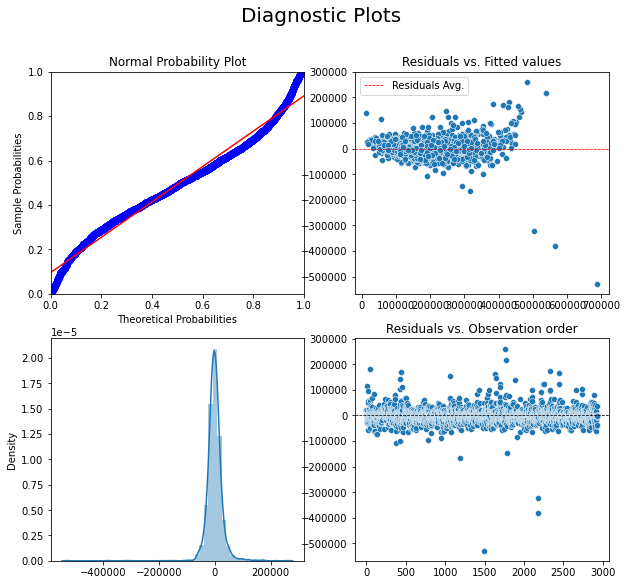

In [291]:
from scipy import stats
from statsmodels.graphics.gofplots import ProbPlot

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,9))
fig.suptitle('Diagnostic Plots', fontsize=20)

ax[0][1].axhline(np.mean(result.resid), color='red', ls='--', lw = 0.75, label='Residuals Avg.')
ax[1][1].axhline(0, color='black', ls='--', lw = 0.75)

ax[0][0].set_title('Normal Probability Plot')
probplot = ProbPlot(result.resid, fit= True)
probplot.ppplot(line= 'r', ax= ax[0][0])

sns.scatterplot(x= result.fittedvalues, y= result.resid, ax= ax[0][1]).set_title('Residuals vs. Fitted values')
sns.distplot(result.resid, ax= ax[1][0])
sns.scatterplot(x= trial.index, y= result.resid, ax= ax[1][1]).set_title('Residuals vs. Observation order')
plt.show()

#### The residuals vs. fitted values scatter plot shows that the average of residuals, red line, is very close to zero, so the linearity assumption is satisfied
#### However the vertical distribution is not so constant by which we can conclude that the variance is not constant
#### The residual are left skewed and we can conclude that residuals do not follow a normal distribution.

## Cooks_d and DFFITS test for checking if outliers are influential parameters

In [292]:
trial.iloc[[result.resid.sort_values().head(1).index[0]]]

,Order,PID,MS_SubClass,Lot_Frontage,Lot_Area,Overall_Qual,Overall_Cond,Year_Built,Year_Remod_Add,Mas_Vnr_Area,BsmtFin_SF_1,BsmtFin_SF_2,Bsmt_Unf_SF,Total_Bsmt_SF,_1st_Flr_SF,_2nd_Flr_SF,Low_Qual_Fin_SF,Gr_Liv_Area,Bsmt_Full_Bath,Bsmt_Half_Bath,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,TotRms_AbvGrd,Fireplaces,Garage_Yr_Blt,Garage_Cars,Garage_Area,Wood_Deck_SF,Open_Porch_SF,Enclosed_Porch,_3Ssn_Porch,Screen_Porch,Pool_Area,Misc_Val,Mo_Sold,Yr_Sold,Exter_Qual_Ex,Exter_Qual_Fa,Exter_Qual_Gd,Exter_Qual_TA,Bsmt_Qual_Ex,Bsmt_Qual_Fa,Bsmt_Qual_Gd,Bsmt_Qual_Po,Bsmt_Qual_TA,Bsmt_Cond_Ex,Bsmt_Cond_Fa,Bsmt_Cond_Gd,Bsmt_Cond_Po,Bsmt_Cond_TA,Kitchen_Qual_Ex,Kitchen_Qual_Fa,Kitchen_Qual_Gd,Kitchen_Qual_Po,Kitchen_Qual_TA
1501,1502,908201110,90,65.0,6012,4,5,1955,1955,0.0,0.0,0.0,0.0,0.0,1152,0,0,1152,0.0,0.0,2,0,2,2,6,0,1978.128845,0.0,0.0,0,0,0,0,0,0,0,6,2008,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [293]:
k = trial.shape[1] - 1 #No. of predictors
n = trial.shape[0] #No. of observations
diffits_ref = 3*np.sqrt((k+2)/(n-k-2)) #Reference value of DIFFITS
influence = result.get_influence()
print(diffits_ref)

0.4269222058319317


In [294]:
influence.summary_frame().loc[(influence.summary_frame(
).cooks_d > 0.5), influence.summary_frame().columns[-6:]]

C:\Users\user\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:693: RuntimeWarning: invalid value encountered in sqrt
  return self.resid / sigma / np.sqrt(1 - hii)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:733: RuntimeWarning: invalid value encountered in sqrt
  dffits_ = self.resid_studentized_internal * np.sqrt(hii / (1 - hii))
C:\Users\user\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:762: RuntimeWarning: invalid value encountered in sqrt
  dffits_ = self.resid_studentized_external * np.sqrt(hii / (1 - hii))


,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
1498,2.014791,-20.409027,0.219087,-10.810083,-22.070386,-11.690058
2180,1.758248,-13.640453,0.354042,-10.098434,-14.103050,-10.440908


### data point with index 1498 & 2180 have very high cooks_d (greater than 1) and high negative dffits

In [295]:
trial2 = df.copy()

trial2['Lot_Frontage'].fillna(value=trial['Lot_Frontage'].mean(),inplace=True)
trial2['Mas_Vnr_Area'].fillna(value=trial['Mas_Vnr_Area'].mean(),inplace=True)
trial2['BsmtFin_SF_1'].fillna(value=trial['BsmtFin_SF_1'].mean(),inplace=True)
trial2['BsmtFin_SF_2'].fillna(value=trial['BsmtFin_SF_2'].mean(),inplace=True)
trial2['Total_Bsmt_SF'].fillna(value=trial['Total_Bsmt_SF'].mean(),inplace=True)
trial2['Bsmt_Half_Bath'].fillna(value=trial['Bsmt_Half_Bath'].mean(),inplace=True)
trial2['Bsmt_Full_Bath'].fillna(value=trial['Bsmt_Full_Bath'].mean(),inplace=True)
trial2['Garage_Yr_Blt'].fillna(value=trial['Garage_Yr_Blt'].mean(),inplace=True)
trial2['Garage_Cars'].fillna(value=trial['Garage_Cars'].mean(),inplace=True)
trial2['Garage_Area'].fillna(value=trial['Garage_Area'].mean(),inplace=True)
trial2['Bsmt_Unf_SF'].fillna(value=trial['Bsmt_Unf_SF'].mean(),inplace=True)
trial2.drop([210,1498,2180], inplace= True)
y = trial2['SalePrice']
y = pd.DataFrame(y)
trial2.drop('SalePrice',inplace=True, axis=1)
x = trial2


In [296]:
x = sm.add_constant(x)
result = sm.OLS(y, x).fit()
 
# printing the summary table
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     493.6
Date:                Tue, 06 Dec 2022   Prob (F-statistic):               0.00
Time:                        22:50:23   Log-Likelihood:                -33769.
No. Observations:                2919   AIC:                         6.764e+04
Df Residuals:                    2867   BIC:                         6.795e+04
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            5.506e+06   4.31e+06     

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


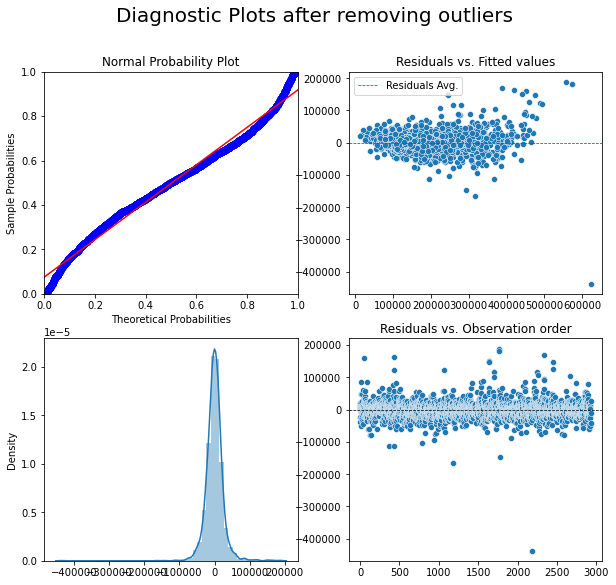

In [298]:
from scipy import stats
from statsmodels.graphics.gofplots import ProbPlot

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,9))
fig.suptitle('Diagnostic Plots after removing outliers', fontsize=20)

ax[0][1].axhline(np.mean(result.resid), color='red', ls='--', lw = 0.75, label='Residuals Avg.')
ax[1][1].axhline(0, color='black', ls='--', lw = 0.75)

ax[0][0].set_title('Normal Probability Plot')
probplot = ProbPlot(result.resid, fit= True)
probplot.ppplot(line= 'r', ax= ax[0][0])

sns.scatterplot(x= result.fittedvalues, y= result.resid, ax= ax[0][1]).set_title('Residuals vs. Fitted values')
sns.distplot(result.resid, ax= ax[1][0])
sns.scatterplot(x= trial2.index, y= result.resid, ax= ax[1][1]).set_title('Residuals vs. Observation order')
plt.show()

### After removing the influential outliers we get a R^2 89.8% from initial value of 86.8%

# Linear Regression

In [301]:
trial2 = df.copy()

trial2['Lot_Frontage'].fillna(value=trial['Lot_Frontage'].mean(),inplace=True)
trial2['Mas_Vnr_Area'].fillna(value=trial['Mas_Vnr_Area'].mean(),inplace=True)
trial2['BsmtFin_SF_1'].fillna(value=trial['BsmtFin_SF_1'].mean(),inplace=True)
trial2['BsmtFin_SF_2'].fillna(value=trial['BsmtFin_SF_2'].mean(),inplace=True)
trial2['Total_Bsmt_SF'].fillna(value=trial['Total_Bsmt_SF'].mean(),inplace=True)
trial2['Bsmt_Half_Bath'].fillna(value=trial['Bsmt_Half_Bath'].mean(),inplace=True)
trial2['Bsmt_Full_Bath'].fillna(value=trial['Bsmt_Full_Bath'].mean(),inplace=True)
trial2['Garage_Yr_Blt'].fillna(value=trial['Garage_Yr_Blt'].mean(),inplace=True)
trial2['Garage_Cars'].fillna(value=trial['Garage_Cars'].mean(),inplace=True)
trial2['Garage_Area'].fillna(value=trial['Garage_Area'].mean(),inplace=True)
trial2['Bsmt_Unf_SF'].fillna(value=trial['Bsmt_Unf_SF'].mean(),inplace=True)
trial2.drop([210,1498,2180], inplace= True)
y = trial2['SalePrice']
y = pd.DataFrame(y)
trial2.drop('SalePrice',inplace=True, axis=1)

X = trial2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression()

In [322]:
coeff=[]
for i in range(0,57):
    coeff.append(regressor.coef_[0][i])
coeff

[-10.353159978308826,
 5.559657816513262e-06,
 -92.75666185729052,
 79.39407361583449,
 0.6051392897472851,
 10512.98184219046,
 6157.8353722491875,
 330.9121853891354,
 59.21036721463702,
 15.965963873919463,
 14.268274072284385,
 9.905901471460766,
 -0.17276760888398712,
 24.001394286131017,
 21.11014376971883,
 26.212470866860713,
 -17.611337442926896,
 29.71129054426001,
 2110.569670153537,
 -2447.3305560939234,
 598.4186226826555,
 246.75190280993328,
 -5303.052876458818,
 -18896.068466094584,
 1168.9550571899076,
 3765.967936128897,
 100.14563494974823,
 282.7612370151275,
 22.760513454091154,
 12.817800201048158,
 -18.596261193993996,
 24.047401581548684,
 -23.607987644046148,
 44.79376646443529,
 -1.7638535684914132,
 0.2613689136906032,
 -72.39380005944832,
 -7852.53576691488,
 23494.169268049918,
 -7244.578975018748,
 -4892.803705589771,
 -11356.786587440241,
 17314.58067352387,
 -13898.117130019353,
 -13219.616047584108,
 -407.47144385337134,
 -15773.118263084394,
 -16550.85

In [332]:
regressor.coef_[0][1]

5.559657816513262e-06

In [333]:
#To retrieve the intercept:
print(regressor.intercept_)

#For retrieving the slope:
print(regressor.coef_)

[14813245.16911399]
[[-1.03531600e+01  5.55965782e-06 -9.27566619e+01  7.93940736e+01
   6.05139290e-01  1.05129818e+04  6.15783537e+03  3.30912185e+02
   5.92103672e+01  1.59659639e+01  1.42682741e+01  9.90590147e+00
  -1.72767609e-01  2.40013943e+01  2.11101438e+01  2.62124709e+01
  -1.76113374e+01  2.97112905e+01  2.11056967e+03 -2.44733056e+03
   5.98418623e+02  2.46751903e+02 -5.30305288e+03 -1.88960685e+04
   1.16895506e+03  3.76596794e+03  1.00145635e+02  2.82761237e+02
   2.27605135e+01  1.28178002e+01 -1.85962612e+01  2.40474016e+01
  -2.36079876e+01  4.47937665e+01 -1.76385357e+00  2.61368914e-01
  -7.23938001e+01 -7.85253577e+03  2.34941693e+04 -7.24457898e+03
  -4.89280371e+03 -1.13567866e+04  1.73145807e+04 -1.38981171e+04
  -1.32196160e+04 -4.07471444e+02 -1.57731183e+04 -1.65508558e+04
  -3.94300640e+03 -2.81919838e+03  2.01369396e+03 -4.68437553e+03
   1.57292413e+04 -4.05589714e+03 -3.74183469e+03  0.00000000e+00
  -7.93150948e+03]]


In [334]:
y_test = y_test.to_numpy()

In [335]:
y_pred = regressor.predict(X_test)
predicted_df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
predicted_df

,Actual,Predicted
0,166000,157485.044803
1,215000,221329.511340
2,115000,111454.423982
3,149350,134539.781156
4,246578,221545.273238
...,...,...
725,445000,410287.100824
726,284000,267632.734891
727,137000,131331.003170
728,198500,197080.101336


In [336]:
import statistics as stats
lst=[y_pred.max(),y_pred.min(),y_pred.mean()]
print(f"Maximum {y_pred.max()}")
print(f"Minimum {y_pred.min()}")
print(f"Average {y_pred.mean()}")
print(stats.stdev(lst))

Maximum 554359.6613737065
Minimum 12087.593219976872
Average 181065.22887685386
277477.0773070149


In [337]:
y_pred

array([[157485.04480349],
       [221329.51133975],
       [111454.42398198],
       [134539.78115618],
       [221545.27323819],
       [132109.32187713],
       [241973.76773439],
       [254816.77200537],
       [141729.66961134],
       [145142.11106383],
       [262375.18168028],
       [112615.42323224],
       [138292.01002848],
       [ 97245.55235315],
       [185257.44310368],
       [187221.16023442],
       [212581.46293087],
       [305029.59977521],
       [225781.56308791],
       [221829.43609223],
       [165267.71648384],
       [112671.43201242],
       [190960.84644565],
       [115128.4996011 ],
       [187824.85123032],
       [438217.27058203],
       [123037.20225803],
       [168914.16493194],
       [313177.43554997],
       [182967.47775052],
       [135076.77812771],
       [158595.32746256],
       [145330.18147624],
       [143603.90975164],
       [192114.8794951 ],
       [272262.39858525],
       [135084.46324881],
       [203046.10655102],
       [2120

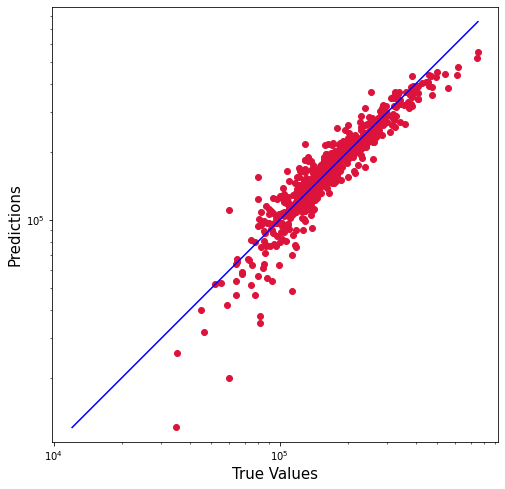

In [338]:
plt.figure(figsize=(8,8))
plt.scatter(y_test, y_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [340]:
def predict(ml_model):
    model= ml_model.fit(X_train,y_train)
    print("Training_Score: {}".format(model.score(X_train,y_train)))
    y_prediction=model.predict(X_test)
    
    from sklearn import metrics
    r2_score=metrics.r2_score(y_test,y_prediction)
    print("r2 Score {}".format(r2_score))
    print("MSE : ", metrics.mean_squared_error(y_test,y_prediction))
    print("MAE : ", metrics.mean_absolute_error(y_test,y_prediction))
    print("RMSE : ",np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))
    
    sns.displot(y_test-y_pred,aspect=3)

Training_Score: 0.894442326701352
r2 Score 0.8996750995547826
MSE :  787897454.5532547
MAE :  18141.48678227262
RMSE :  28069.511120667114


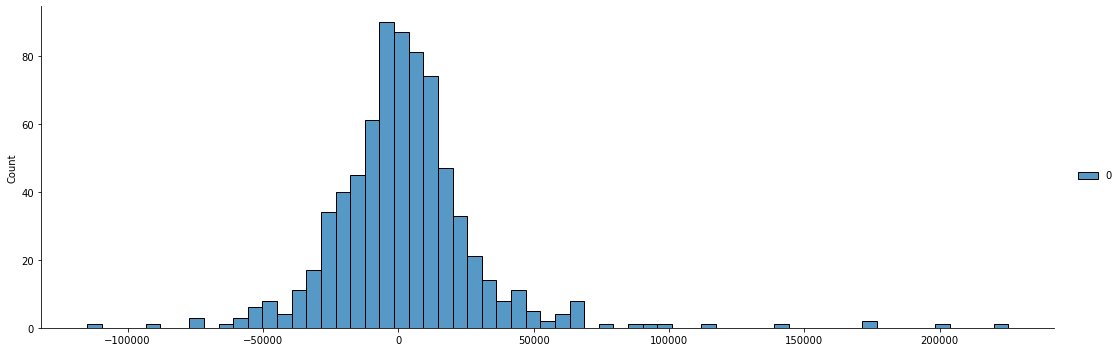

In [341]:
predict(LinearRegression()) #observe peak desnsity at Price=0

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


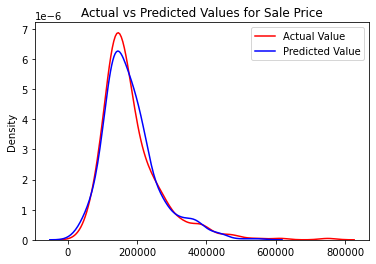

In [342]:
ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value");
sns.distplot(y_pred, hist=False, color="b", label="Predicted Values" , ax=ax);

plt.title('Actual vs Predicted Values for Sale Price');

plt.legend(labels=['Actual Value', 'Predicted Value'])

plt.show();


# Logistic Regression

In [343]:
data = trial2.copy()
df['SalePrice'].mean()

180761.1930184805

In [344]:
data = df.copy()

data['Lot_Frontage'].fillna(value=trial['Lot_Frontage'].mean(),inplace=True)
data['Mas_Vnr_Area'].fillna(value=trial['Mas_Vnr_Area'].mean(),inplace=True)
data['BsmtFin_SF_1'].fillna(value=trial['BsmtFin_SF_1'].mean(),inplace=True)
data['BsmtFin_SF_2'].fillna(value=trial['BsmtFin_SF_2'].mean(),inplace=True)
data['Total_Bsmt_SF'].fillna(value=trial['Total_Bsmt_SF'].mean(),inplace=True)
data['Bsmt_Half_Bath'].fillna(value=trial['Bsmt_Half_Bath'].mean(),inplace=True)
data['Bsmt_Full_Bath'].fillna(value=trial['Bsmt_Full_Bath'].mean(),inplace=True)
data['Garage_Yr_Blt'].fillna(value=trial['Garage_Yr_Blt'].mean(),inplace=True)
data['Garage_Cars'].fillna(value=trial['Garage_Cars'].mean(),inplace=True)
data['Garage_Area'].fillna(value=trial['Garage_Area'].mean(),inplace=True)
data['Bsmt_Unf_SF'].fillna(value=trial['Bsmt_Unf_SF'].mean(),inplace=True)
data.drop([210,1498,2180], inplace= True)
data['SalePrice >180000']=data['SalePrice'].apply(lambda x: 'Yes' if x>180000 else 'No')
y = data['SalePrice >180000']
data.drop('SalePrice >180000',inplace = True, axis=1)
X = data
pd.get_dummies(X)
X

,Order,PID,MS_SubClass,Lot_Frontage,Lot_Area,Overall_Qual,Overall_Cond,Year_Built,Year_Remod_Add,Mas_Vnr_Area,BsmtFin_SF_1,BsmtFin_SF_2,Bsmt_Unf_SF,Total_Bsmt_SF,_1st_Flr_SF,_2nd_Flr_SF,Low_Qual_Fin_SF,Gr_Liv_Area,Bsmt_Full_Bath,Bsmt_Half_Bath,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,TotRms_AbvGrd,Fireplaces,Garage_Yr_Blt,Garage_Cars,Garage_Area,Wood_Deck_SF,Open_Porch_SF,Enclosed_Porch,_3Ssn_Porch,Screen_Porch,Pool_Area,Misc_Val,Mo_Sold,Yr_Sold,SalePrice,Exter_Qual_Ex,Exter_Qual_Fa,Exter_Qual_Gd,Exter_Qual_TA,Bsmt_Qual_Ex,Bsmt_Qual_Fa,Bsmt_Qual_Gd,Bsmt_Qual_Po,Bsmt_Qual_TA,Bsmt_Cond_Ex,Bsmt_Cond_Fa,Bsmt_Cond_Gd,Bsmt_Cond_Po,Bsmt_Cond_TA,Kitchen_Qual_Ex,Kitchen_Qual_Fa,Kitchen_Qual_Gd,Kitchen_Qual_Po,Kitchen_Qual_TA
0,1,526301100,20,141.00000,31770,6,5,1960,1960,112.0,639.0,0.0,441.0,1080.0,1656,0,0,1656,1.0,0.0,1,0,3,1,7,2,1960.000000,2.0,528.0,210,62,0,0,0,0,0,5,2010,215000,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1
1,2,526350040,20,80.00000,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1961.000000,1.0,730.0,140,0,0,0,120,0,0,6,2010,105000,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
2,3,526351010,20,81.00000,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329,0.0,0.0,1,1,3,1,6,0,1958.000000,1.0,312.0,393,36,0,0,0,0,12500,6,2010,172000,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0
3,4,526353030,20,93.00000,11160,7,5,1968,1968,0.0,1065.0,0.0,1045.0,2110.0,2110,0,0,2110,1.0,0.0,2,1,3,1,8,2,1968.000000,2.0,522.0,0,0,0,0,0,0,0,4,2010,244000,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0
4,5,527105010,60,74.00000,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,928.0,928,701,0,1629,0.0,0.0,2,1,3,1,6,1,1997.000000,2.0,482.0,212,34,0,0,0,0,0,3,2010,189900,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,37.00000,7937,6,6,1984,1984,0.0,819.0,0.0,184.0,1003.0,1003,0,0,1003,1.0,0.0,1,0,3,1,6,0,1984.000000,2.0,588.0,120,0,0,0,0,0,0,3,2006,142500,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
2926,2927,923276100,20,69.22459,8885,5,5,1983,1983,0.0,301.0,324.0,239.0,864.0,902,0,0,902,1.0,0.0,1,0,2,1,5,0,1983.000000,2.0,484.0,164,0,0,0,0,0,0,6,2006,131000,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2927,2928,923400125,85,62.00000,10441,5,5,1992,1992,0.0,337.0,0.0,575.0,912.0,970,0,0,970,0.0,1.0,1,0,3,1,6,0,1978.128845,0.0,0.0,80,32,0,0,0,0,700,7,2006,132000,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2928,2929,924100070,20,77.00000,10010,5,5,1974,1975,0.0,1071.0,123.0,195.0,1389.0,1389,0,0,1389,1.0,0.0,1,0,2,1,6,1,1975.000000,2.0,418.0,240,38,0,0,0,0,0,4,2006,170000,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1


In [345]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)
from sklearn.linear_model import LogisticRegression


# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [346]:
y_pred_test = logreg.predict(X_test)
y_pred_test
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.7548


In [347]:
y_pred_train = logreg.predict(X_train)

y_pred_train
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))


Training-set accuracy score: 0.7693


In [348]:
from sklearn.metrics import classification_report
print (classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

          No       0.83      0.77      0.80       460
         Yes       0.65      0.72      0.69       270

    accuracy                           0.75       730
   macro avg       0.74      0.75      0.74       730
weighted avg       0.76      0.75      0.76       730



In [349]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[356 104]
 [ 75 195]]

True Positives(TP) =  356

True Negatives(TN) =  195

False Positives(FP) =  104

False Negatives(FN) =  75


<AxesSubplot:>

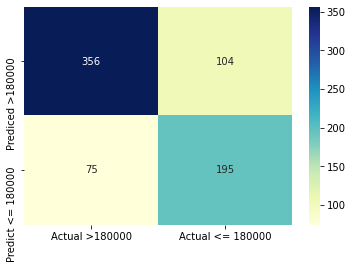

In [350]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual >180000', 'Actual <= 180000'], 
                                 index=['Prediced >180000', 'Predict <= 180000'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

## From above confusion matrix :
 - 356 houses were predicted to have sales price > 180000 and the prediction was correct (TP)
 - 104  houses were predicted to have sales price > 180000 but the actual price was <=180000 (FP)
 - 75 houses were predicted to have sales price <= 180000 but the actual price was >180000 (FN)
 - 195 houses were predicted to have sales price <= 180000 and the actual price was <= 180000 (TN)

In [351]:
356/(356+104)

0.7739130434782608

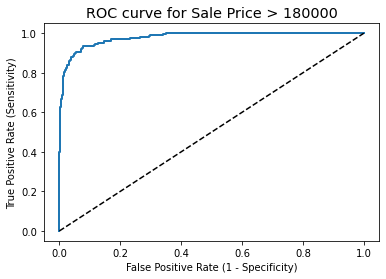

In [352]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label = 'Yes')

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Sale Price > 180000')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

# WHen is the best time to sell my house

In [ ]:
df.groupby('Mo_Sold')['SalePrice'].mean().plot(marker='o')

In [ ]:
df.groupby('Mo_Sold')['SalePrice'].mean()

In [ ]:
df['SalePrice'].median()

In [ ]:
data = df.copy()
for i in data['SalePrice']:
    data['SalePrice > 160000']=data['SalePrice'].apply(lambda x:'Y' if x>=160000 else 'N')

In [ ]:
data

In [ ]:
data["a"]=1

In [ ]:
data.drop('a',inplace=True,axis=1)

In [ ]:
data

In [ ]:
f, ax = plt.subplots(figsize=(5, 5))
sns.barplot(data['SalePrice > 160000'].unique(),data['SalePrice > 160000'].value_counts().unique())

In [ ]:
data['SalePrice > 160000'].unique()

In [ ]:
x=pd.get_dummies(df[cat_features])
x['SalePrice'] = df['SalePrice']
corrmat = x.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
corrmat

In [ ]:
f, ax = plt.subplots(figsize=(10, 10))
corr_cols = x.corr().nlargest(10, 'SalePrice').index
sns.heatmap(x[corr_cols].corr(), vmax=.8, square=True,annot=True);

In [ ]:
x
x['SalePrice'] = df['SalePrice']
x

In [ ]:
df=data.copy()
data['Pool_QC'].fillna("Missing",inplace=True)
data['Alley'].fillna("Missing",inplace=True)

In [ ]:
data["Pool_QC"].unique()

In [ ]:
data.groupby("Alley")['SalePrice'].mean().plot.bar()
data.groupby("Pool_QC")['SalePrice'].mean().plot.bar()

In [ ]:
data["Pool_QC"].value_counts()

In [ ]:
df['Alley'].unique()

In [ ]:
X = pd.get_dummies(df[cat_features])
y = df["SalePrice"]

In [ ]:
data["SalePrice >160000"] = data['SalePrice'].apply(lambda x:'Y' if x>=160000 else 'N')

In [ ]:
data

In [ ]:
x=df.groupby('Year_Built')['SalePrice'].mean()
len(x)

In [ ]:
dec1=[]
dec2=[]
for i in df["Year_Built"]:
    if i >1872 and i<1882:
        dec1.append(i)
for j in range(dec1):
    print(df.groupby(j)['SalePrice'])

In [ ]:
year=pd.DataFrame(data.groupby('Year_Built')['SalePrice'].mean())
a=year[0:4].mean()
b=year[4:7].mean()
c=year[7:13]
d=year[14:21]
e=year[21:31]
f=year[32:41]
g=year[42:50]
h=year[51:58]
i=year[59:68]
j=year[69:78]
k=year[79:88]
l=year[88:98]
m=year[98:108]
n=year[108:118]
x=pd.concat([a,b])
x

In [ ]:
#rslt_df = dataframe[dataframe['Percentage'] > 80]
#result = data['Year_Built'] > 1872 and data['Year_Built'] < 1882
year.columns
# x = (df['SalePrice'][df[df['Year_Built']<=2005 and df['Year_Built']>1995 ].index.values]).mean()
# print(x)

# Principal Component Analysis

In [357]:
trial2 = df[num_features].copy()

trial2['Lot_Frontage'].fillna(value=trial['Lot_Frontage'].mean(),inplace=True)
trial2['Mas_Vnr_Area'].fillna(value=trial['Mas_Vnr_Area'].mean(),inplace=True)
trial2['BsmtFin_SF_1'].fillna(value=trial['BsmtFin_SF_1'].mean(),inplace=True)
trial2['BsmtFin_SF_2'].fillna(value=trial['BsmtFin_SF_2'].mean(),inplace=True)
trial2['Total_Bsmt_SF'].fillna(value=trial['Total_Bsmt_SF'].mean(),inplace=True)
trial2['Bsmt_Half_Bath'].fillna(value=trial['Bsmt_Half_Bath'].mean(),inplace=True)
trial2['Bsmt_Full_Bath'].fillna(value=trial['Bsmt_Full_Bath'].mean(),inplace=True)
trial2['Garage_Yr_Blt'].fillna(value=trial['Garage_Yr_Blt'].mean(),inplace=True)
trial2['Garage_Cars'].fillna(value=trial['Garage_Cars'].mean(),inplace=True)
trial2['Garage_Area'].fillna(value=trial['Garage_Area'].mean(),inplace=True)
trial2['Bsmt_Unf_SF'].fillna(value=trial['Bsmt_Unf_SF'].mean(),inplace=True)

data['SalePrice >180000']=data['SalePrice'].apply(lambda x: 'Yes' if x>180000 else 'No')
y = data['SalePrice >180000']
data.drop('SalePrice >180000',inplace = True, axis=1)
X = data
pd.get_dummies(X)
X

,Order,PID,MS_SubClass,Lot_Frontage,Lot_Area,Overall_Qual,Overall_Cond,Year_Built,Year_Remod_Add,Mas_Vnr_Area,BsmtFin_SF_1,BsmtFin_SF_2,Bsmt_Unf_SF,Total_Bsmt_SF,_1st_Flr_SF,_2nd_Flr_SF,Low_Qual_Fin_SF,Gr_Liv_Area,Bsmt_Full_Bath,Bsmt_Half_Bath,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,TotRms_AbvGrd,Fireplaces,Garage_Yr_Blt,Garage_Cars,Garage_Area,Wood_Deck_SF,Open_Porch_SF,Enclosed_Porch,_3Ssn_Porch,Screen_Porch,Pool_Area,Misc_Val,Mo_Sold,Yr_Sold,SalePrice,Exter_Qual_Ex,Exter_Qual_Fa,Exter_Qual_Gd,Exter_Qual_TA,Bsmt_Qual_Ex,Bsmt_Qual_Fa,Bsmt_Qual_Gd,Bsmt_Qual_Po,Bsmt_Qual_TA,Bsmt_Cond_Ex,Bsmt_Cond_Fa,Bsmt_Cond_Gd,Bsmt_Cond_Po,Bsmt_Cond_TA,Kitchen_Qual_Ex,Kitchen_Qual_Fa,Kitchen_Qual_Gd,Kitchen_Qual_Po,Kitchen_Qual_TA
0,1,526301100,20,141.00000,31770,6,5,1960,1960,112.0,639.0,0.0,441.0,1080.0,1656,0,0,1656,1.0,0.0,1,0,3,1,7,2,1960.000000,2.0,528.0,210,62,0,0,0,0,0,5,2010,215000,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1
1,2,526350040,20,80.00000,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1961.000000,1.0,730.0,140,0,0,0,120,0,0,6,2010,105000,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
2,3,526351010,20,81.00000,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329,0.0,0.0,1,1,3,1,6,0,1958.000000,1.0,312.0,393,36,0,0,0,0,12500,6,2010,172000,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0
3,4,526353030,20,93.00000,11160,7,5,1968,1968,0.0,1065.0,0.0,1045.0,2110.0,2110,0,0,2110,1.0,0.0,2,1,3,1,8,2,1968.000000,2.0,522.0,0,0,0,0,0,0,0,4,2010,244000,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0
4,5,527105010,60,74.00000,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,928.0,928,701,0,1629,0.0,0.0,2,1,3,1,6,1,1997.000000,2.0,482.0,212,34,0,0,0,0,0,3,2010,189900,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,37.00000,7937,6,6,1984,1984,0.0,819.0,0.0,184.0,1003.0,1003,0,0,1003,1.0,0.0,1,0,3,1,6,0,1984.000000,2.0,588.0,120,0,0,0,0,0,0,3,2006,142500,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
2926,2927,923276100,20,69.22459,8885,5,5,1983,1983,0.0,301.0,324.0,239.0,864.0,902,0,0,902,1.0,0.0,1,0,2,1,5,0,1983.000000,2.0,484.0,164,0,0,0,0,0,0,6,2006,131000,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2927,2928,923400125,85,62.00000,10441,5,5,1992,1992,0.0,337.0,0.0,575.0,912.0,970,0,0,970,0.0,1.0,1,0,3,1,6,0,1978.128845,0.0,0.0,80,32,0,0,0,0,700,7,2006,132000,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2928,2929,924100070,20,77.00000,10010,5,5,1974,1975,0.0,1071.0,123.0,195.0,1389.0,1389,0,0,1389,1.0,0.0,1,0,2,1,6,1,1975.000000,2.0,418.0,240,38,0,0,0,0,0,4,2006,170000,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1


In [358]:
from sklearn.preprocessing import StandardScaler

features = data.columns
x = df.loc[:, features].values
print(x)
y = df.loc[:,['SalePrice']].values
x = StandardScaler().fit_transform(x)
np.nan_to_num(x, copy=False, nan=0.0, posinf=0.0, neginf=0.0)
pd.DataFrame(data = x, columns = features).head()

[[1.00000000e+00 5.26301100e+08 2.00000000e+01 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [2.00000000e+00 5.26350040e+08 2.00000000e+01 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [3.00000000e+00 5.26351010e+08 2.00000000e+01 ... 1.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [2.92800000e+03 9.23400125e+08 8.50000000e+01 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [2.92900000e+03 9.24100070e+08 2.00000000e+01 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [2.93000000e+03 9.24151050e+08 6.00000000e+01 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]]


,Order,PID,MS_SubClass,Lot_Frontage,Lot_Area,Overall_Qual,Overall_Cond,Year_Built,Year_Remod_Add,Mas_Vnr_Area,BsmtFin_SF_1,BsmtFin_SF_2,Bsmt_Unf_SF,Total_Bsmt_SF,_1st_Flr_SF,_2nd_Flr_SF,Low_Qual_Fin_SF,Gr_Liv_Area,Bsmt_Full_Bath,Bsmt_Half_Bath,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,TotRms_AbvGrd,Fireplaces,Garage_Yr_Blt,Garage_Cars,Garage_Area,Wood_Deck_SF,Open_Porch_SF,Enclosed_Porch,_3Ssn_Porch,Screen_Porch,Pool_Area,Misc_Val,Mo_Sold,Yr_Sold,SalePrice,Exter_Qual_Ex,Exter_Qual_Fa,Exter_Qual_Gd,Exter_Qual_TA,Bsmt_Qual_Ex,Bsmt_Qual_Fa,Bsmt_Qual_Gd,Bsmt_Qual_Po,Bsmt_Qual_TA,Bsmt_Cond_Ex,Bsmt_Cond_Fa,Bsmt_Cond_Gd,Bsmt_Cond_Po,Bsmt_Cond_TA,Kitchen_Qual_Ex,Kitchen_Qual_Fa,Kitchen_Qual_Gd,Kitchen_Qual_Po,Kitchen_Qual_TA
0,-1.732446,-0.999690,-0.874377,3.366915,2.740833,-0.063629,-0.506957,-0.374336,-1.162372,0.054795,0.433633,-0.293066,-0.271745,0.064785,1.265531,-0.784916,-0.101145,0.307223,1.086928,-0.249673,-1.027673,-0.756827,0.170906,-0.207587,0.350521,2.172329,-0.709250,0.307158,0.256624,0.920228,0.215359,-0.359392,-0.103277,-0.285777,-0.063118,-0.089546,-0.447763,1.679689,0.428133,-0.194963,-0.110106,-0.710922,0.790086,-0.311202,-0.176214,-0.841293,-0.026171,1.130254,-0.032059,-0.192108,4.790701,-0.041402,-2.881967,-0.274683,-0.156666,-0.807329,-0.018503,0.978332
1,-1.731263,-0.999430,-0.874377,0.502766,0.184828,-0.773259,0.391907,-0.341309,-1.114485,-0.570035,0.058254,0.558526,-0.660899,-0.384152,-0.671886,-0.784916,-0.101145,-1.195555,-0.819276,-0.249673,-1.027673,-0.756827,-1.044150,-0.207587,-0.924181,-0.924035,-0.670128,-1.006473,1.195029,0.366762,-0.702606,-0.359392,-0.103277,1.851423,-0.063118,-0.089546,-0.079418,1.679689,-0.947343,-0.194963,-0.110106,-0.710922,0.790086,-0.311202,-0.176214,-0.841293,-0.026171,1.130254,-0.032059,-0.192108,-0.208738,-0.041402,0.346985,-0.274683,-0.156666,-0.807329,-0.018503,0.978332
2,-1.730080,-0.999425,-0.874377,0.549719,0.520377,-0.063629,0.391907,-0.440389,-1.258147,0.032480,1.057069,-0.293066,-0.351396,0.629357,0.431932,-0.784916,-0.101145,-0.339367,-0.819276,-0.249673,-1.027673,1.231886,0.170906,-0.207587,-0.286830,-0.924035,-0.787496,-1.006473,-0.746819,2.367148,-0.169594,-0.359392,-0.103277,-0.285777,-0.063118,21.955686,-0.079418,1.679689,-0.109553,-0.194963,-0.110106,-0.710922,0.790086,-0.311202,-0.176214,-0.841293,-0.026171,1.130254,-0.032059,-0.192108,-0.208738,-0.041402,0.346985,-0.274683,-0.156666,1.238652,-0.018503,-1.022148
3,-1.728897,-0.999415,-0.874377,1.113158,0.126218,0.646002,-0.506957,-0.110123,-0.779274,-0.570035,1.368787,-0.293066,1.102813,2.400165,2.422882,-0.784916,-0.101145,1.204936,1.086928,-0.249673,0.781279,1.231886,0.170906,-0.207587,0.987873,2.172329,-0.396268,0.307158,0.228751,-0.740172,-0.702606,-0.359392,-0.103277,-0.285777,-0.063118,-0.089546,-0.816109,1.679689,0.790759,-0.194963,-0.110106,1.406625,-1.265685,-0.311202,-0.176214,-0.841293,-0.026171,1.130254,-0.032059,-0.192108,-0.208738,-0.041402,0.346985,3.640557,-0.156666,-0.807329,-0.018503,-1.022148
4,-1.727713,-0.995430,0.065410,0.221046,0.464938,-0.773259,-0.506957,0.847650,0.657344,-0.570035,0.767303,-0.293066,-0.963575,-0.279854,-0.590310,0.850839,-0.101145,0.253835,-0.819276,-0.249673,0.781279,1.231886,0.170906,-0.207587,-0.286830,0.624147,0.738292,0.307158,0.042928,0.936041,-0.199206,-0.359392,-0.103277,-0.285777,-0.063118,-0.089546,-1.184455,1.679689,0.114275,-0.194963,-0.110106,-0.710922,0.790086,-0.311202,-0.176214,1.188647,-0.026171,-0.884757,-0.032059,-0.192108,-0.208738,-0.041402,0.346985,-0.274683,-0.156666,-0.807329,-0.018503,0.978332


In [361]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf.head(5)

,principal component 1,principal component 2
0,-0.000587,3.955924
1,-3.055426,0.836838
2,-0.789581,2.142268
3,3.308418,3.004243
4,0.461069,-0.720416


In [366]:
pca.explained_variance_ratio_

array([0.18440966, 0.06628297])

# Forward Selection of Categorical features 

In [77]:
cat_features.isnull().sum
df[cat_features].drop('Neighborhood',inplace=True,axis=1)

C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [78]:
X=pd.get_dummies(df[cat_features])
y=df['SalePrice']
X.head(3)

,MS_Zoning_A (agr),MS_Zoning_C (all),MS_Zoning_FV,MS_Zoning_I (all),MS_Zoning_RH,MS_Zoning_RL,MS_Zoning_RM,Street_Grvl,Street_Pave,Lot_Shape_IR1,Lot_Shape_IR2,Lot_Shape_IR3,Lot_Shape_Reg,Land_Contour_Bnk,Land_Contour_HLS,Land_Contour_Low,Land_Contour_Lvl,Utilities_AllPub,Utilities_NoSeWa,Utilities_NoSewr,Lot_Config_Corner,Lot_Config_CulDSac,Lot_Config_FR2,Lot_Config_FR3,Lot_Config_Inside,Land_Slope_Gtl,Land_Slope_Mod,Land_Slope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition_1_Artery,Condition_1_Feedr,Condition_1_Norm,Condition_1_PosA,Condition_1_PosN,Condition_1_RRAe,Condition_1_RRAn,Condition_1_RRNe,Condition_1_RRNn,Condition_2_Artery,Condition_2_Feedr,Condition_2_Norm,Condition_2_PosA,Condition_2_PosN,Condition_2_RRAe,Condition_2_RRAn,Condition_2_RRNn,Bldg_Type_1Fam,Bldg_Type_2fmCon,Bldg_Type_Duplex,Bldg_Type_Twnhs,Bldg_Type_TwnhsE,House_Style_1.5Fin,House_Style_1.5Unf,House_Style_1Story,House_Style_2.5Fin,House_Style_2.5Unf,House_Style_2Story,House_Style_SFoyer,House_Style_SLvl,Roof_Style_Flat,Roof_Style_Gable,Roof_Style_Gambrel,Roof_Style_Hip,Roof_Style_Mansard,Roof_Style_Shed,Roof_Matl_ClyTile,Roof_Matl_CompShg,Roof_Matl_Membran,Roof_Matl_Metal,Roof_Matl_Roll,Roof_Matl_Tar&Grv,Roof_Matl_WdShake,Roof_Matl_WdShngl,Exterior_1st_AsbShng,Exterior_1st_AsphShn,Exterior_1st_BrkComm,Exterior_1st_BrkFace,Exterior_1st_CBlock,Exterior_1st_CemntBd,Exterior_1st_HdBoard,Exterior_1st_ImStucc,Exterior_1st_MetalSd,Exterior_1st_Plywood,Exterior_1st_PreCast,Exterior_1st_Stone,Exterior_1st_Stucco,Exterior_1st_VinylSd,Exterior_1st_Wd Sdng,Exterior_1st_WdShing,Exterior_2nd_AsbShng,Exterior_2nd_AsphShn,Exterior_2nd_Brk Cmn,Exterior_2nd_BrkFace,Exterior_2nd_CBlock,Exterior_2nd_CmentBd,Exterior_2nd_HdBoard,Exterior_2nd_ImStucc,Exterior_2nd_MetalSd,Exterior_2nd_Other,Exterior_2nd_Plywood,Exterior_2nd_PreCast,Exterior_2nd_Stone,Exterior_2nd_Stucco,Exterior_2nd_VinylSd,Exterior_2nd_Wd Sdng,Exterior_2nd_Wd Shng,Mas_Vnr_Type_BrkCmn,Mas_Vnr_Type_BrkFace,Mas_Vnr_Type_CBlock,Mas_Vnr_Type_None,Mas_Vnr_Type_Stone,Exter_Qual_Ex,Exter_Qual_Fa,Exter_Qual_Gd,Exter_Qual_TA,Exter_Cond_Ex,Exter_Cond_Fa,Exter_Cond_Gd,Exter_Cond_Po,Exter_Cond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Bsmt_Qual_Ex,Bsmt_Qual_Fa,Bsmt_Qual_Gd,Bsmt_Qual_Po,Bsmt_Qual_TA,Bsmt_Cond_Ex,Bsmt_Cond_Fa,Bsmt_Cond_Gd,Bsmt_Cond_Po,Bsmt_Cond_TA,Bsmt_Exposure_Av,Bsmt_Exposure_Gd,Bsmt_Exposure_Mn,Bsmt_Exposure_No,BsmtFin_Type_2_ALQ,BsmtFin_Type_2_BLQ,BsmtFin_Type_2_GLQ,BsmtFin_Type_2_LwQ,BsmtFin_Type_2_Rec,BsmtFin_Type_2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Heating_QC_Ex,Heating_QC_Fa,Heating_QC_Gd,Heating_QC_Po,Heating_QC_TA,Central_Air_N,Central_Air_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Kitchen_Qual_Ex,Kitchen_Qual_Fa,Kitchen_Qual_Gd,Kitchen_Qual_Po,Kitchen_Qual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Sev,Functional_Typ,Garage_Type_2Types,Garage_Type_Attchd,Garage_Type_Basment,Garage_Type_BuiltIn,Garage_Type_CarPort,Garage_Type_Detchd,Paved_Drive_N,Paved_Drive_P,Paved_Drive_Y,Sale_Type_COD,Sale_Type_CWD,Sale_Type_Con,Sale_Type_ConLD,Sale_Type_ConLI,Sale_Type_ConLw,Sale_Type_New,Sale_Type_Oth,Sale_Type_VWD,Sale_Type_WD,Sale_Condition_Abnorml,Sale_Condition_AdjLand,Sale_Condition_Alloca,Sale_Condition_Family,Sale_Condition_Normal,Sale_Condition_Partial
0,0,0,0,0,0,1,

In [79]:
from sklearn.model_selection import train_test_split
X_train, y_train, X_test, y_test= train_test_split(X,y,test_size=0.25,random_state=100)

In [80]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()
sfs1 = sfs(lreg, k_features=4, forward=True, verbose=2, scoring='r2')

sfs1 = sfs1.fit(X, y)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 228 out of 228 | elapsed:    2.1s finished

[2022-12-06 17:38:01] Features: 1/4 -- score: 0.34460378989866847[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 227 out of 227 | elapsed:    2.6s finished

[2022-12-06 17:38:04] Features: 2/4 -- score: 0.5119594379716824[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 226 out of 226 | elapsed:    2.7s finished

[2022-12-06 17:38:07] Features: 3/4 -- score: 0.5507320745676669[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1

In [81]:
feat_names = list(sfs1.k_feature_names_)
print(feat_names)
len(feat_names)

['Exter_Qual_TA', 'Bsmt_Qual_Ex', 'Bsmt_Qual_Gd', 'Kitchen_Qual_Ex']


4